In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the xlsx file
data = pd.read_excel("Cleaned Data.xlsx", sheet_name = "Data")
list(data.keys())

['Article_title',
 'Article_link',
 'General_outcome',
 'General_outcome (1,0)',
 'Desc_general_outcome',
 'Daily_intake',
 'Descr_daily_intake',
 'Health_outcome',
 'Descr_health_outcome',
 'Environmental_outcome',
 'Descr_environmental_outcome',
 'Fund_source',
 'Fund_Source',
 'University',
 'Private',
 'Private & Public',
 'Private & University',
 'Public',
 'Public & International Org',
 'Public & University',
 'University & International Org',
 'International Org',
 'Research Institution',
 'Not Available',
 'Author_affiliation',
 'Loc_authors',
 'Loc_experiment',
 'Year',
 'Journal',
 'Loc_journal',
 'Loc_editor_journal',
 'Current Impact_Factor',
 'Impact_F_Publishing_Year',
 'Num_Citations']

In [2]:
# remove extraneous spaces and standardize capitalization
strip_cols = ["Fund_source", "Fund_Source", "Loc_authors","Loc_experiment", 
              "Loc_journal", "Loc_editor_journal"]
for key in strip_cols:
    data[key] = data[key].str.strip().str.upper()

In [3]:
#transform outcomes to indicator variables
outcomes = ["Health_outcome", "Environmental_outcome"]
for outcome in outcomes:
    data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
    data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
    data[outcome].fillna(0, inplace = True)
    
# create column that combines environmental and health outcomes
# if value from either column is 1, entry in Either_outcome is 1, else 0
data["General_outcome"] = 0
data["General_outcome"][data["Health_outcome"] ==1] = 1
data["General_outcome"][data["Environmental_outcome"] ==1] = 1

<ipython-input-3-3a35d3532438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
<ipython-input-3-3a35d3532438>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
<ipython-input-3-3a35d3532438>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["General_outcome"][data["Health_outcome"] ==1] = 1
<ipython-input-

In [4]:
def create_indicators(data, column_names):

    # create a dictionary with the set of possible responses for each heading in the headings list
    indicator_responses = {heading : sorted(list(set(data[heading]))) for heading in headings}

    # cycle through the heading and possible responses
    for heading, responses in indicator_responses.items():

        # for each possible response, create a new column
        for response in responses:
            # make all values in that column 0 by default
            data[response] = 0
            # identify the subset of data where the data in the row matches response
            # make values in that column 1 if their response matches the response 
            # in the original column of data
            data[response][data[heading] == response] = 1


In [5]:
funding_sources = ["Public", "Private", "University", "International", "Research"]
data["Fund_Source"].fillna("", inplace = True)
data["Fund_Source"] = data["Fund_Source"].str.title()
for source in funding_sources:
    data[source] = 0
    data[source][data["Fund_Source"].str.contains(source)]=1

<ipython-input-5-fbe39f1ce96e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Fund_Source"].str.contains(source)]=1


In [6]:
nations = list(set(data["Loc_experiment"]))
remove_pairs = ["BELGIUM & GERMANY", "ITALY & NETHERLANDS", "CANADA & USA", "UK & USA"]
for pair in remove_pairs:
    nations.remove(pair)
for nation in nations:
    data[nation] = 0
    data[nation][data["Loc_experiment"].str.contains(nation)]=1
data

<ipython-input-6-2cee338bc8f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nation][data["Loc_experiment"].str.contains(nation)]=1


,Article_title,Article_link,General_outcome,"General_outcome (1,0)",Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,...,NIGERIA,CANADA,TAIWAN,CHINA,POLAND,JAPAN,IRAN,SWEDEN,AUSTRIA,SRI LANKA
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,...,0,1,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,...,0,0,0,0,0,0,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Effect of glyphosate herbicide on acetylcholin...,https://doi.org/10.1016/j.ecoenv.2005.07.017,1,1,The present study reveals that exposure of L. ...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
499,Comparative cyto- and genotoxicity assessment ...,https://doi.org/10.1016/j.envres.2019.108851,1,1,the GBHs-induced DNA damage observed in the co...,NaN,NaN,1,the GBHs-induced DNA damage observed in the co...,0,...,0,0,0,0,0,0,0,0,0,0
500,Genotoxic effects of glyphosate on Physalaemus...,https://doi.org/10.1016/j.etap.2020.103516,1,1,Glyphosate herbicide can be considered a genot...,NaN,NaN,1,Glyphosate herbicide can be considered a genot...,0,...,0,0,0,0,0,0,0,0,0,0
501,Ecotoxicological risk assessment for the herbi...,https://doi.org/10.1016/j.envpol.2017.10.100,1,1,Potential adverse effect on aquatic invertebrates,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1

<ipython-input-7-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-7-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-7-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-7-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
data.to_excel("dataWithSomeReformatting.xlsx")

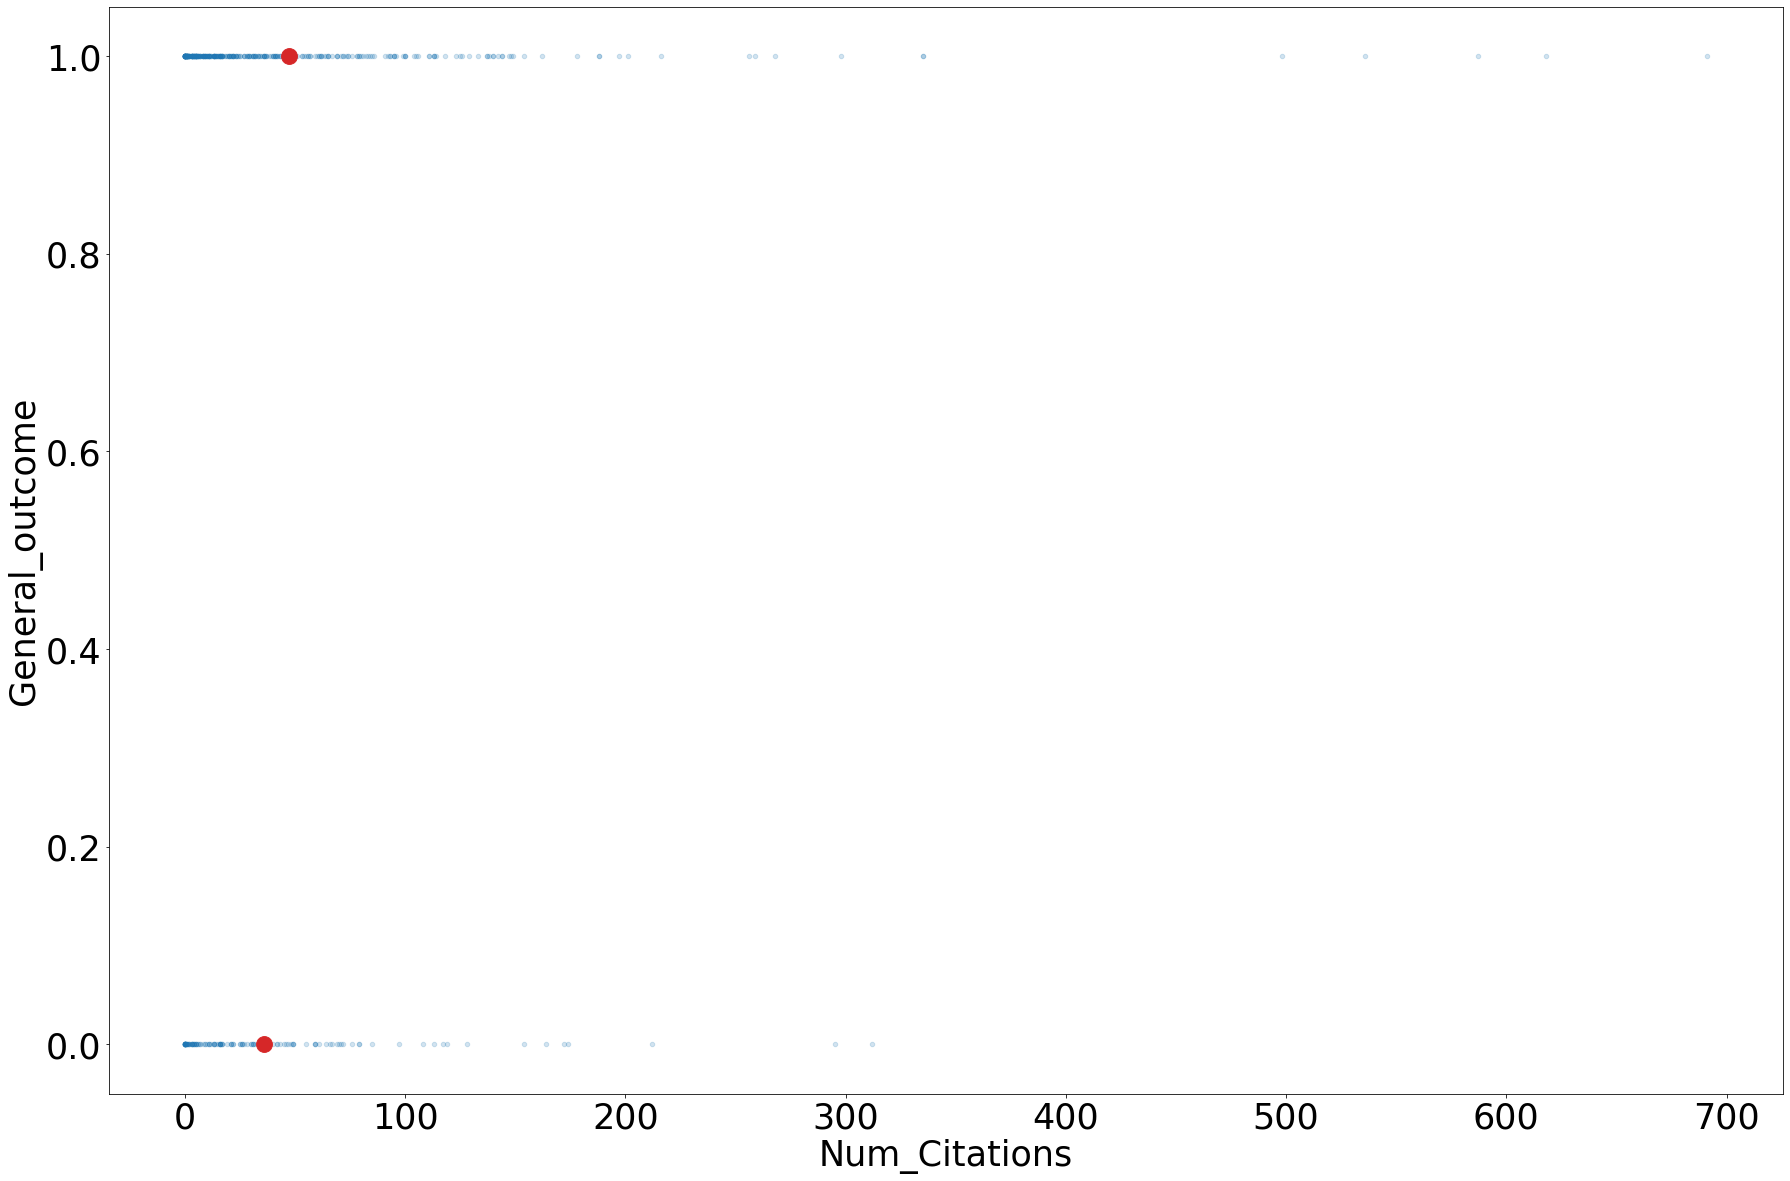

In [9]:
plt.rcParams["font.size"] = 35
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Num_Citations", y = "General_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Num_Citations"][data["General_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Num_Citations"][data["General_outcome"]==0].mean(), y=0, s = 250, c = "C3")

Text(0.5, 1.0, 'Num_Citations')

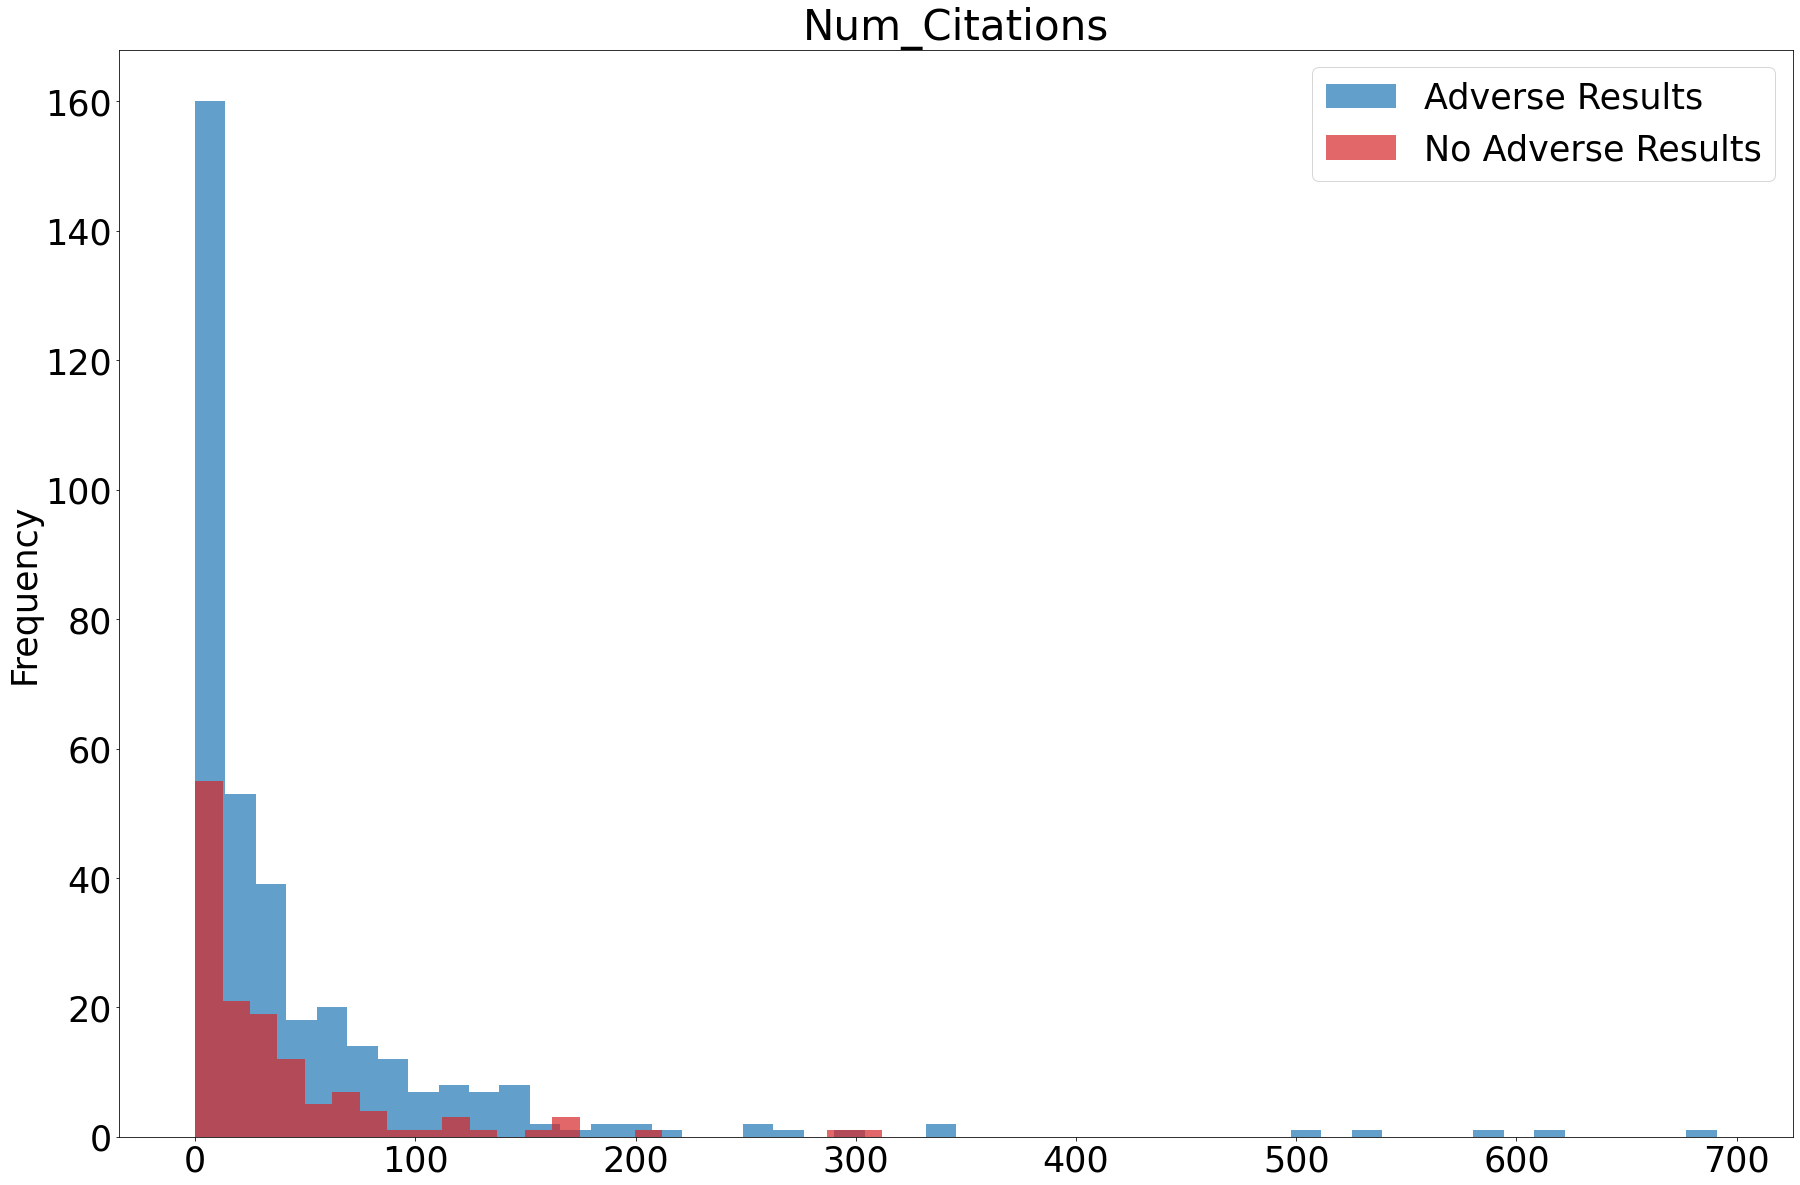

In [10]:
fig,ax =plt.subplots(figsize = (30,20))
data["Num_Citations"][data["General_outcome"]==1].plot.hist(alpha = .7,
                                                           color = "C0", ax = ax, bins = 50,
                                                          label = "Adverse Results")
data["Num_Citations"][data["General_outcome"]==0].plot.hist(alpha = .7, color = "C3", ax = ax, 
                                                           bins = 25, label = "No Adverse Results")
plt.legend()
plt.title("Num_Citations")

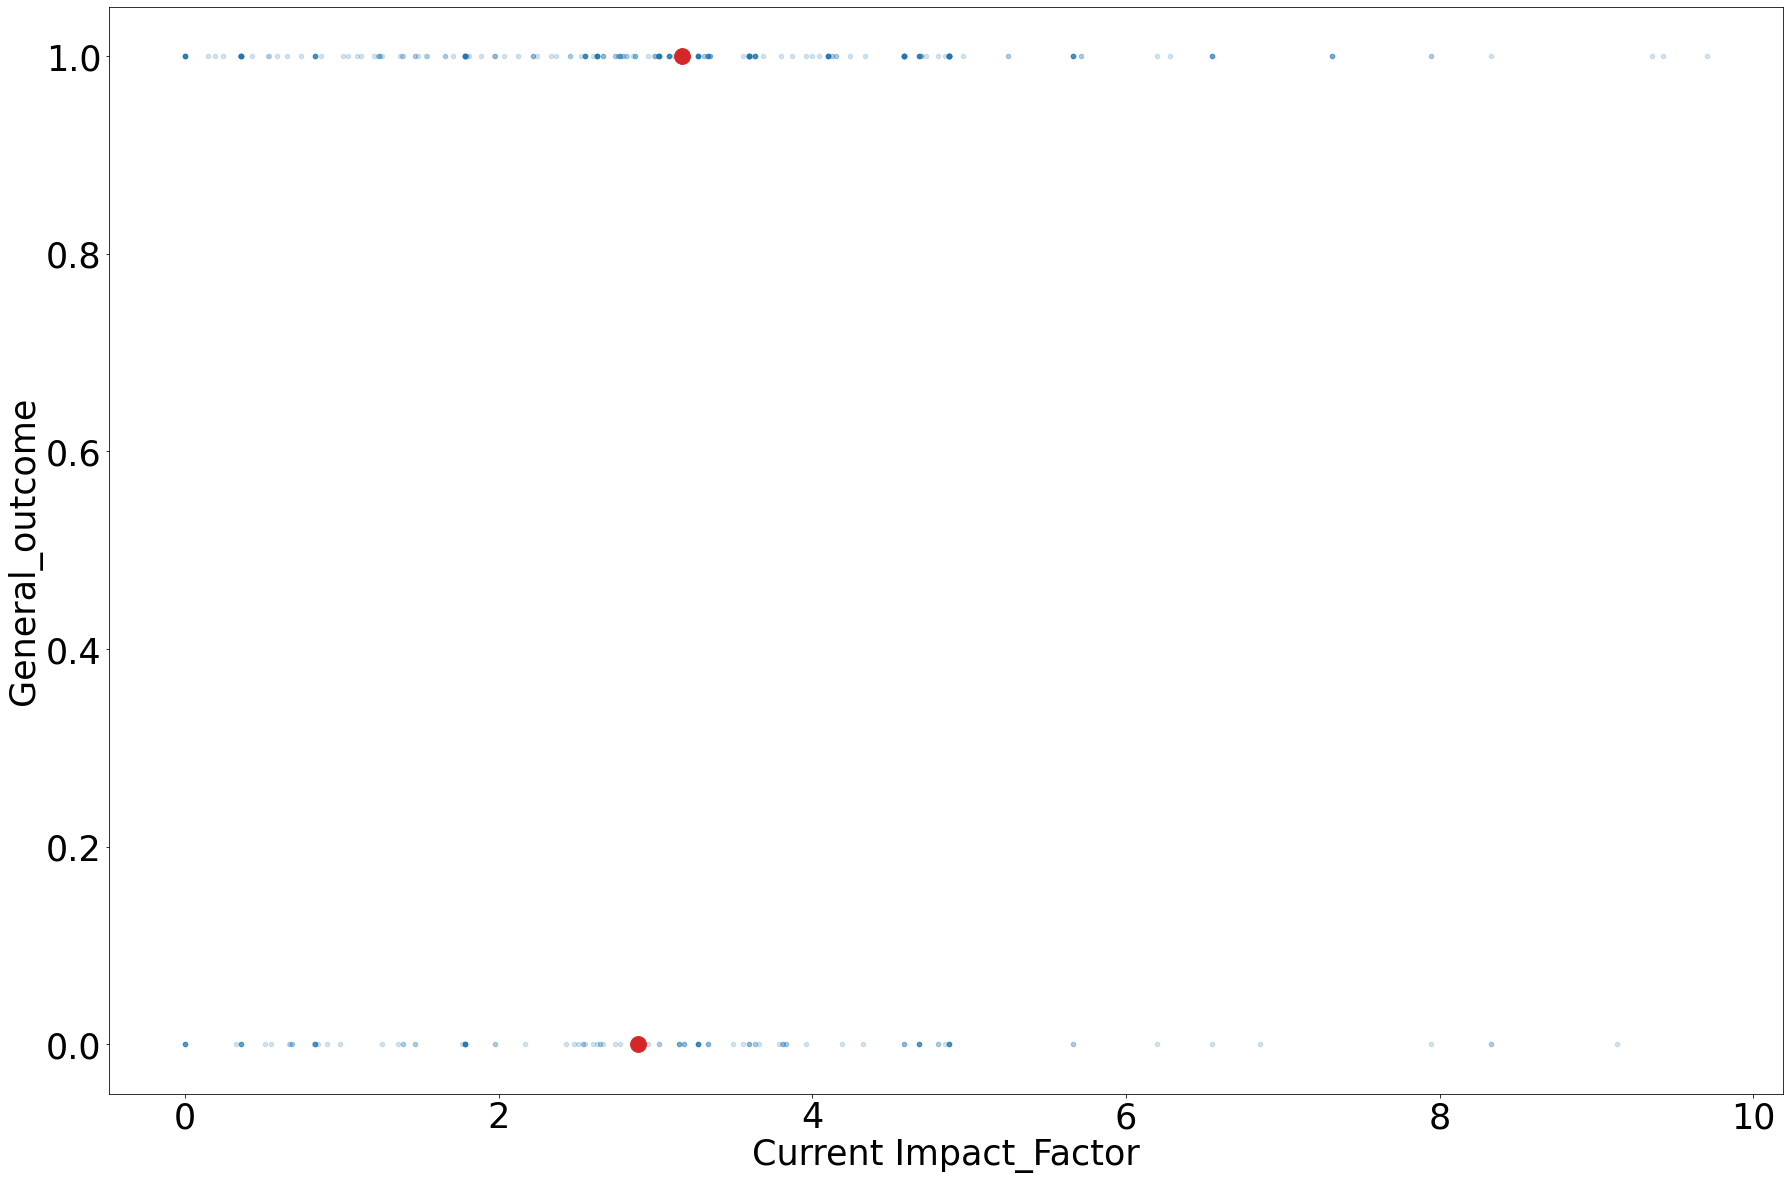

In [11]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Current Impact_Factor", y = "General_outcome", alpha=.2, ax=ax)
ax.scatter(x = data["Current Impact_Factor"][data["General_outcome"]==1].mean(), y=1, s = 250, c = "C3")
ax.scatter(x = data["Current Impact_Factor"][data["General_outcome"]==0].mean(), y=0, s = 250, c = "C3")

Text(0.5, 1.0, 'Current Impact_Factor')

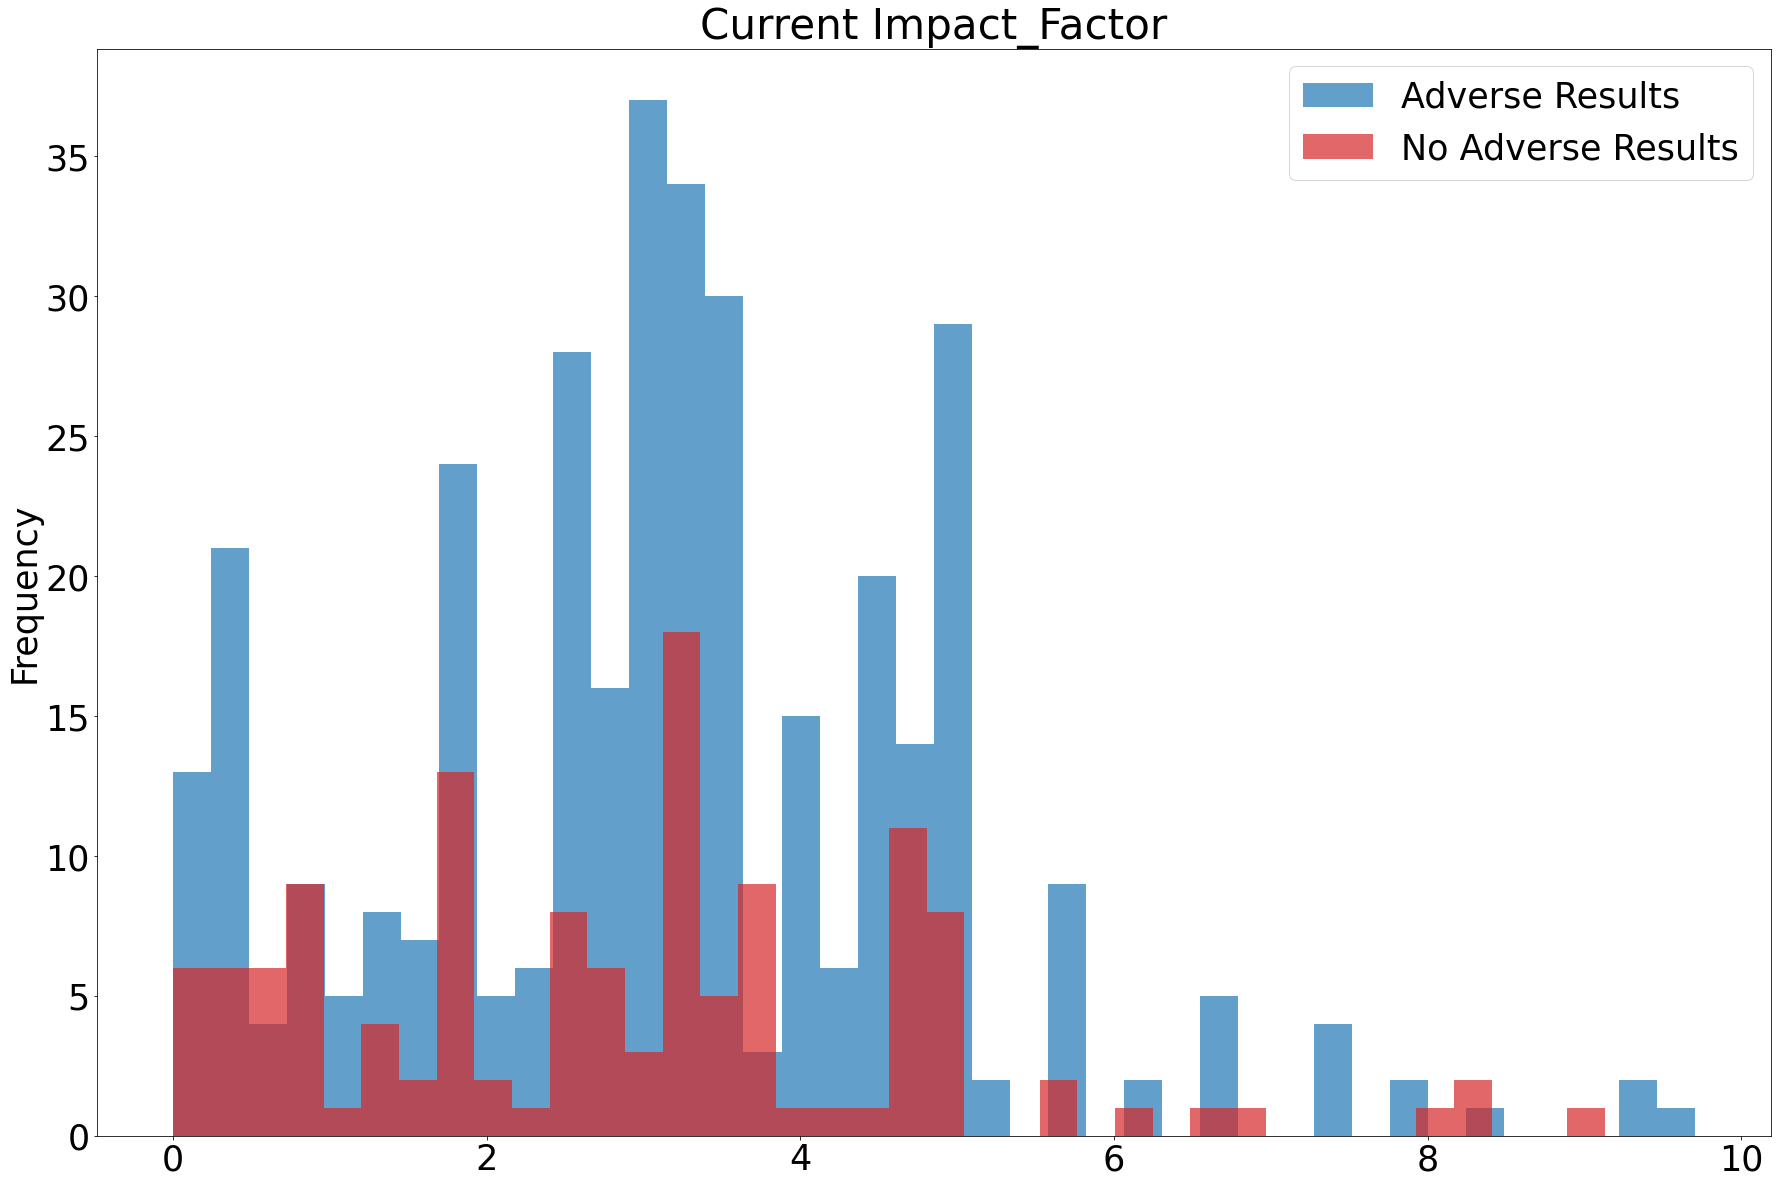

In [12]:
fig,ax =plt.subplots(figsize = (30,20))
data["Current Impact_Factor"][data["General_outcome"]==1].plot.hist(alpha = .7,
                                                           color = "C0", ax = ax, bins = 40,
                                                          label = "Adverse Results")
data["Current Impact_Factor"][data["General_outcome"]==0].plot.hist(alpha = .7, color = "C3", ax = ax, 
                                                           bins = 38, label = "No Adverse Results")
plt.legend()
plt.title("Current Impact_Factor")

<AxesSubplot:xlabel='Year', ylabel='General_outcome'>

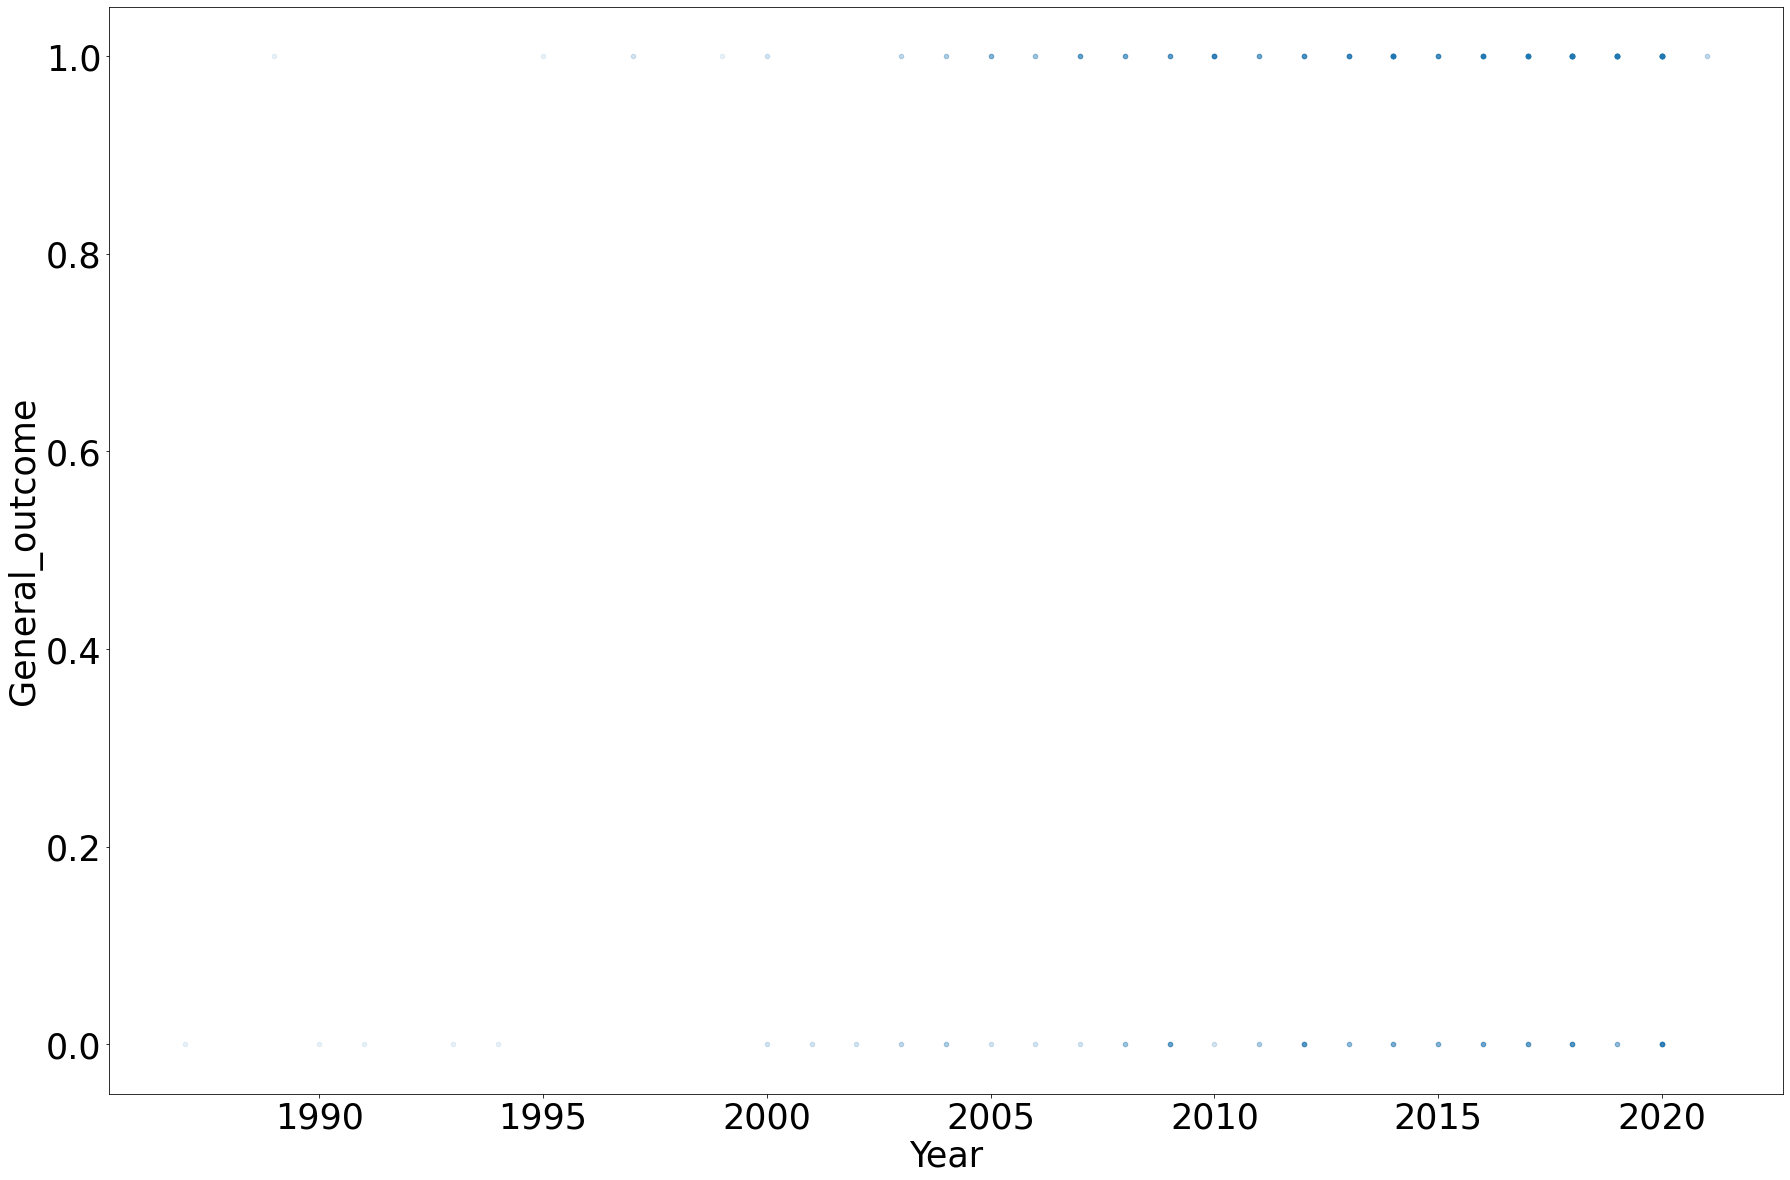

In [13]:
fig,ax =plt.subplots(figsize = (30,20))
data.plot.scatter(x="Year", y = "General_outcome", alpha =.1, ax=ax)

In [14]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [15]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["General_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()

# sort by number of observations
outcomes_by_country.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
BRAZIL,0.803922,102
ARGENTINA,0.886076,79
USA,0.555556,63
CANADA,0.433333,30
FRANCE,0.875000,24
CHINA,0.863636,22
POLAND,0.705882,17
ITALY,0.750000,16
GERMANY,0.600000,15


In [16]:
# sort by average of "Either_outcome"
outcomes_by_country.sort_values("General_outcome", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
GREECE,1.000000,2
SWEDEN,1.000000,2
NORWAY,1.000000,1
NEW ZEALAND,1.000000,1
NETHERLANDS,1.000000,1
MOROCCO,1.000000,2
SLOVAK REPUBLIC,1.000000,1
SOUTH AFRICA,1.000000,2
ITALY & NETHERLANDS,1.000000,1


In [17]:
data.groupby("Journal").mean()[[]]

""
Journal
3Biotech
Acta Agrobotanica
Acta Scientiarum. Agronomy
Aeolian Research
"Agriculture, Ecosystems & Environment"
Agronomy
Anais Da Academia Brasileira De Ciencias
Analytical and Bioanalytical Chemistry
Annals of Tropical Medicine and Health


In [18]:
# Average Outcome by Journal - Sort by number of observations
outcomes_by_journal = data.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal["num_obs"] = data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.810811,37
Aquatic Toxicology,0.869565,23
Bulletin of Environmental Contamination and Toxicology,0.695652,23
Environmental Toxicology and Pharmacology,0.869565,23
Planta Daninha,0.782609,23
Environmental Toxicology and Chemistry,0.578947,19
Food and Chemical Toxicology,0.571429,14
"Journal of Environmental Science and Health, Part B",0.583333,12
Toxicology,1.000000,12


In [19]:
# Average Outcome by Journal - Sort by Average Outcome
outcomes_by_journal.sort_values("General_outcome", ascending = False)

,General_outcome,num_obs
Journal,,
3Biotech,1.000000,1
Journal of Developmental Origins of Health and Disease,1.000000,1
Journal of the Canadian Association of Gastroenterology,1.000000,1
Journal of Toxicology,1.000000,1
Journal of Soils and Sediments,1.000000,2
Journal of Proteomics,1.000000,1
Journal of Pharmaceutical Research International,1.000000,1
Journal of Occupational Medicine and Toxicology,1.000000,1
Journal of Marine Science and Engineering,1.000000,1


In [20]:
# Average Outcome Value by Fund_Source
outcome_by_funding_agg = data.groupby("Fund_Source").mean()[["General_outcome"]]
outcome_by_funding_agg["num_obs"] =data["Fund_Source"].value_counts()
outcome_by_funding_agg.sort_values("General_outcome", ascending = False)

,General_outcome,num_obs
Fund_Source,,
Public And International Org,1.000000,2
Public & Private,1.000000,1
University And Public,1.000000,2
University (Thesis),1.000000,1
Research Centre,1.000000,2
Public And Unversity,1.000000,2
Public And Universty,1.000000,3
Public And Phd Funding,1.000000,1
Public And Internatonal Org,1.000000,1


In [21]:
# Average Outcome Value by Fund_source
outcomes_by_funding_particular = data.groupby("Fund_source").mean()[["General_outcome"]]
outcomes_by_funding_particular["num_obs"] = data["Fund_source"].value_counts()
outcomes_by_funding_particular

,General_outcome,num_obs
Fund_source,,
ACADEMY OF FINLAND,1.000000,1
"ACADEMY OF FINLAND (PROJECTS 326226 AND 311077), THE MAJ AND TOR NESSLING FOUNDATION (GRANT NO. 201800048 TO AM), AND THE FINNISH CULTURAL FOUNDATION.",1.000000,1
"ACADEMY OF FINLAND [PROJECTS OF LL, NO: 250248 & 252411], ALFRED KORDELIN FOUNDATION (MR) AND TIINA AND ANTTI HERLIN FOUNDATION (MR)",1.000000,1
"ACADEMY OF SCIENCE FOR DEVELOPING WORLD (TWAS) AND THE DEPARTMENT OF BIOTECHNOLOGY (DBT), MINISTRY OF SCIENCE AND TECHNOLOGY, GOVERNMENT OF INDIA FOR THE POST-DOCTORAL FELLOWSHIP (PDF",1.000000,1
ADEME (AGENCE DE L’ENVIRONNEMENT ET DE LA MAÎTRISE DE L’ENERGIE) AND THE REGIONAL COUNCIL OF FRANCHE-COMTÉ.,1.000000,1
AFK FROM THE NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCIENCES,0.000000,1
AFYON KOCATEPE UNIVERSITY SCIENTIFIC RESEARCH PROJECT COORDINATION UNIT,1.000000,1
"AG SPECTRUM CO. DEWITT, IOWA AND USDA SPECIAL GRANT NUMBER 2003-06156",0.000000,1
"AGENCIA DE PROMOCIÓN CIENTÍFICA Y TECNOLÓGICA (ANPCYT-FONCYT) (PICT 2008-229) TO SBR, CONSEJO NACIONAL DE INVESTIGACIONES CIENTÍFICAS Y TECNOLÓGICAS (CONICET) (PIP 0947) TO SBR, SECRETARÍA DE CIENCIA Y TECNOLOGÍA (SECTEL) PROVINCIA DE SANTA FE (NOS. 217309 AND 2010-105-11) TO SBR AND UNIVERSIDAD NACIONAL DE ROSARIO (UNR BIO 249) TO SBR, ARGENTINA.",1.000000,1


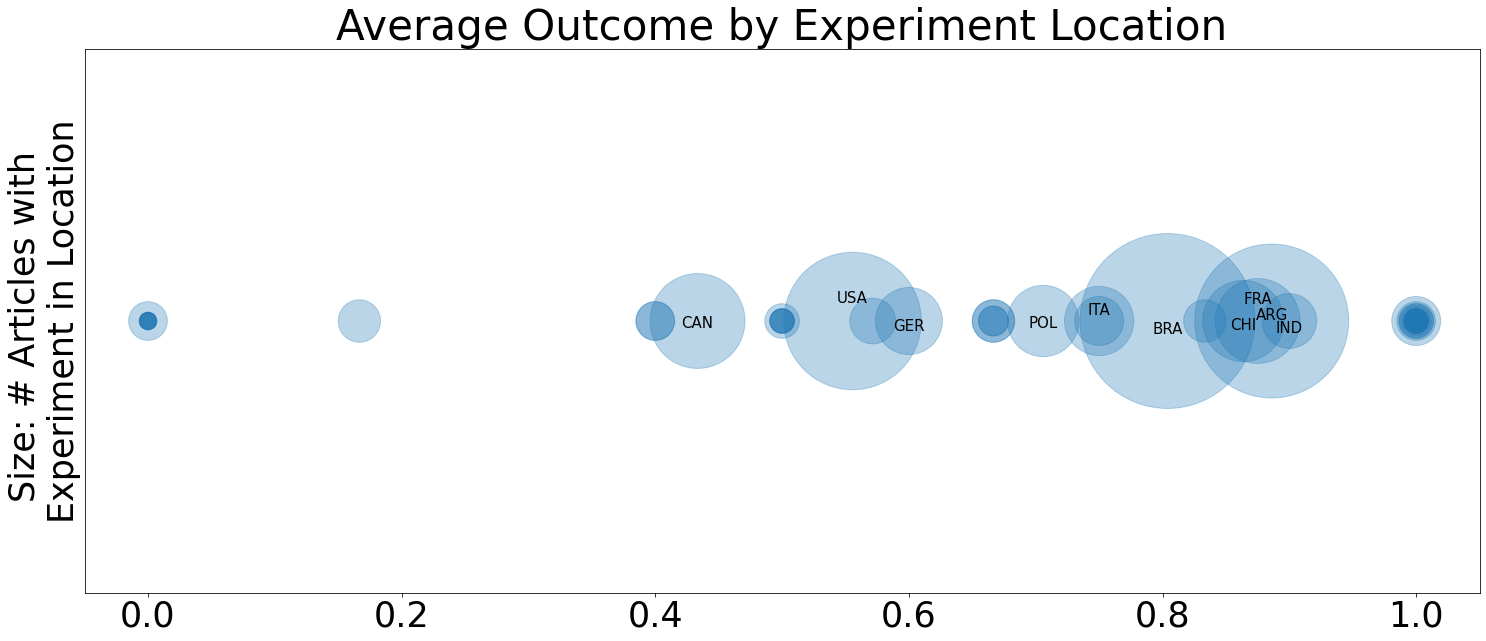

In [22]:
import random
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Experiment Location")
ax.set_ylabel('Size: # Articles with \nExperiment in Location')
ax.set_yticks([])
plt.scatter(x = outcomes_by_country["General_outcome"], y = [0] * len(outcomes_by_country.index), 
            s = outcomes_by_country["num_obs"]*300, alpha = .3)

index= list(outcomes_by_country.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax.text(outcomes_by_country["General_outcome"].loc[ix],-.004 + random.random()* 0.008,ix[:3], ha="center", fontsize = 15)

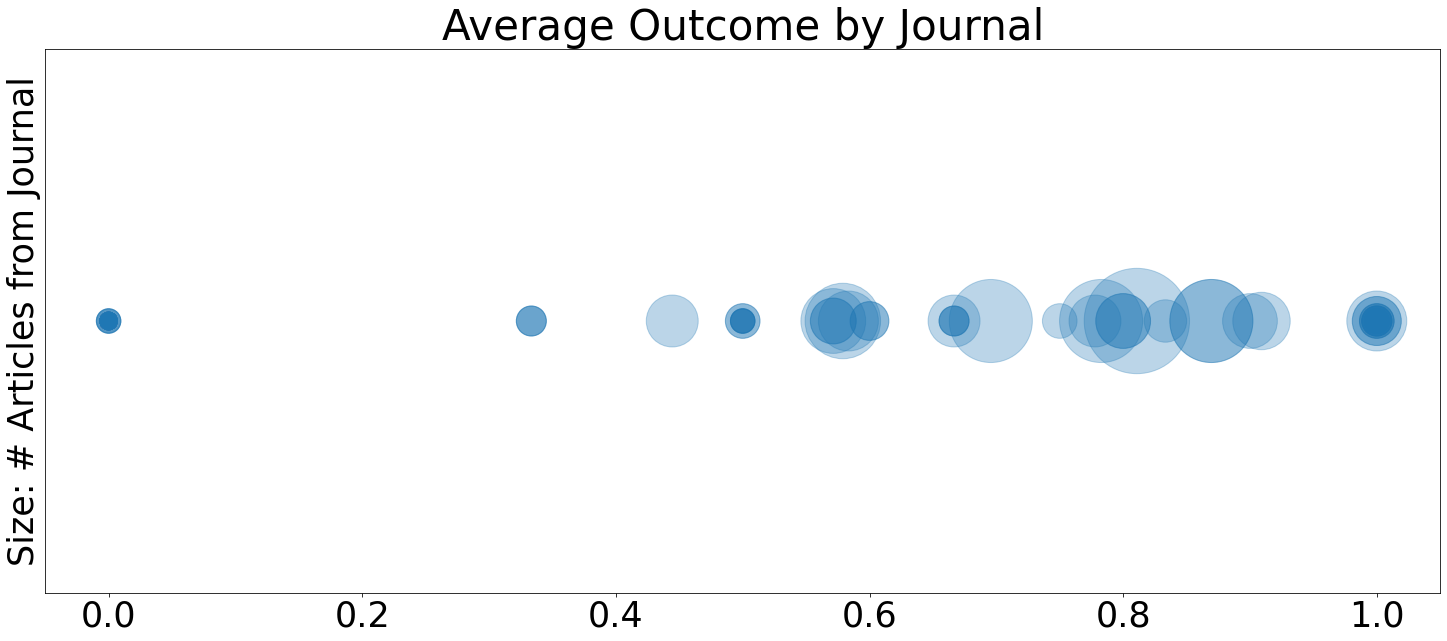

In [23]:
fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Journal")
ax.set_ylabel('Size: # Articles from Journal')
ax.set_yticks([])
plt.scatter(x = outcomes_by_journal["General_outcome"], y = [0] * len(outcomes_by_journal.index), 
            s = outcomes_by_journal["num_obs"]*300, alpha = .3)

# Kodjo, I have grouped outcomes by country and year, and compared outcomes from each country to the mean outcomes forom the dataset that we have compiled.

# I have also included a list of journals, make similar visualizations with data accourding to each journal.

In [24]:
data[data["USA"] ==1].groupby("Year").count()


,Article_title,Article_link,General_outcome,"General_outcome (1,0)",Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,Descr_environmental_outcome,Fund_source,Fund_Source,University,Private,Private & Public,Private & University,Public,Public & International Org,Public & University,University & International Org,International Org,Research Institution,Not Available,Author_affiliation,Loc_authors,Loc_experiment,Journal,Loc_journal,Loc_editor_journal,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,International,Research,ITALY,BRAZIL,TURKEY,ROMANIA,SLOVAK REPUBLIC,SWITZERLAND,IRAQ,BRAZL,SERBIA,UKRAINE,FINLAND,SLOVENIA,AUSTRALIA,CAMEROON,ECUADOR,SPAIN,FRANCE,INDIA,COLOMBIA,NORWAY,GERMANY,PORTUGAL,DENMARK,ARGENTINA,USA,EGYPT,HUNGARY,THAILAND,CROATIA,NETHERLANDS,REPUBLIC OF KOREA,IRELAND,BELGIUM,MEXICO,NEW ZEALAND,MOROCCO,GREECE,UK,TUNISIA,SOUTH AFRICA,LATVIA,NIGERIA,CANADA,TAIWAN,CHINA,POLAND,JAPAN,IRAN,SWEDEN,AUSTRIA,SRI LANKA,1987,1989,1990,1991,1993,1994,1995,1997,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1987,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1991,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1997,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1999,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2001,2,2,2,2,2,0,0,2,1,2,1,2,2,2,2,0,0,2,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2003,3,3,3,3,3,0,0,3,0,3,3,2,3,3,3,0,0,3,0,0,0,0,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2004,4,4,4,4,4,1,1,4,2,4,1,4,4,4,4,0,0,4,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2005,3,3,3,3,3,0,0,3,1,3,2,3,3,3,3,0,1,3,0,0,0,0,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2007,2,2,2,2,2,0,0,2,1,2,1,2,2,2,2,1,0,2,0,1,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [25]:
# positive results by year
data[data["USA"] ==1].groupby("Year").sum()["General_outcome"]


Year
1987    0
1991    0
1997    1
1999    1
2001    0
2003    0
2004    1
2005    1
2007    1
2008    0
2009    0
2010    3
2011    1
2012    1
2013    0
2014    1
2015    1
2016    6
2017    2
2018    7
2019    4
2020    5
Name: General_outcome, dtype: int64

In [26]:
# negative results by year
data[data["USA"] ==1].groupby("Year").count()["General_outcome"].sub(data[data["USA"] ==1].groupby("Year").sum()["General_outcome"])


Year
1987    1
1991    1
1997    0
1999    0
2001    2
2003    3
2004    3
2005    2
2007    1
2008    1
2009    1
2010    0
2011    0
2012    2
2013    2
2014    1
2015    1
2016    2
2017    1
2018    1
2019    1
2020    3
Name: General_outcome, dtype: int64

In [27]:
countries = sorted(nations)
years = sorted(list(set(data["Year"])))


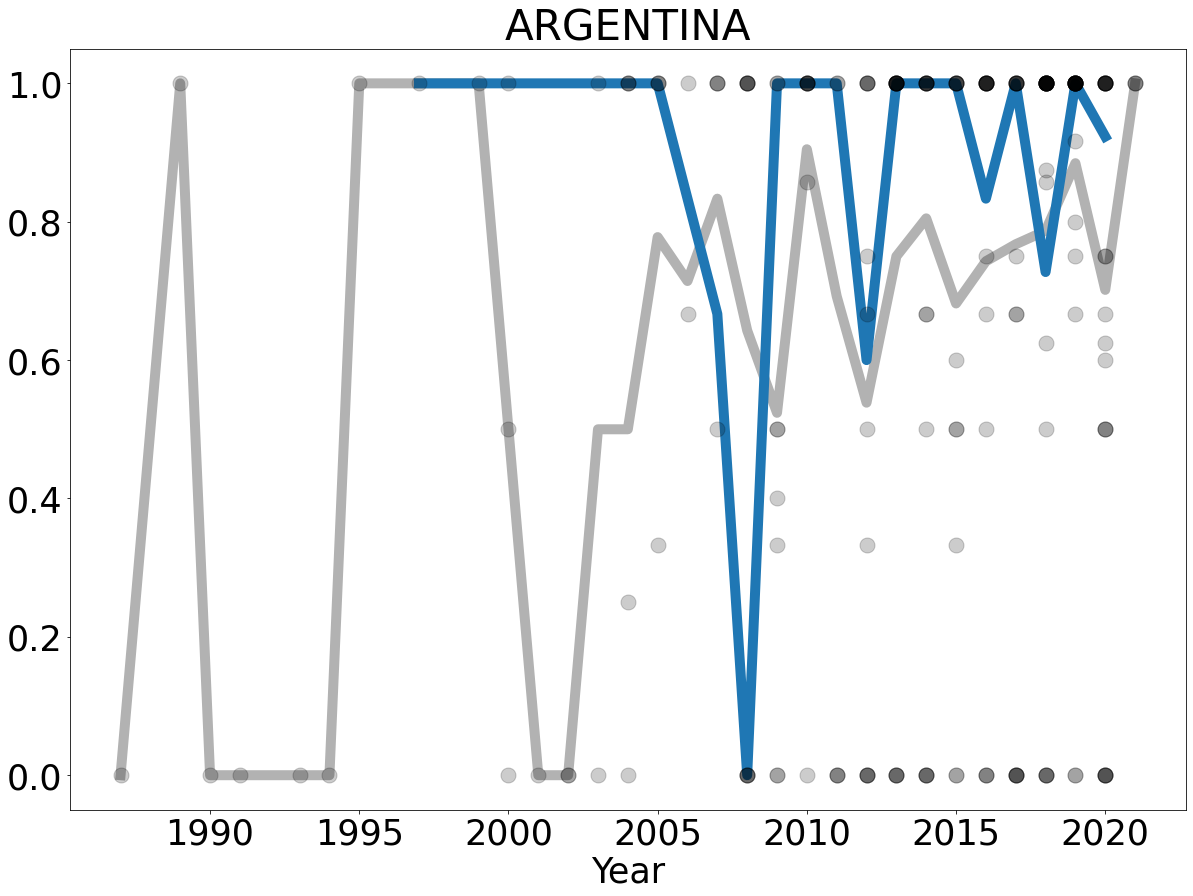

In [28]:
country = "ARGENTINA"
fig, ax = plt.subplots(figsize =(20,14))
other_countries = [c for c in countries if c != country]
data.groupby("Year").mean()["General_outcome"].plot.line(color = "k", linewidth = 10, alpha = .3, ax = ax)
data[data[country] == 1].groupby("Year").mean()["General_outcome"].plot.line(linewidth = 10, ax = ax)


#     mean_outcomes[country].plot.line(linewidth = 10, ax = ax)
for c in other_countries:
    data[data[c] == 1].groupby("Year").mean()["General_outcome"].plot.line(ls = " ", marker = ".", markersize = 30, linewidth = 5, color = "k", alpha = .2, ax = ax)
plt.title(country)
plt.show()
plt.close()

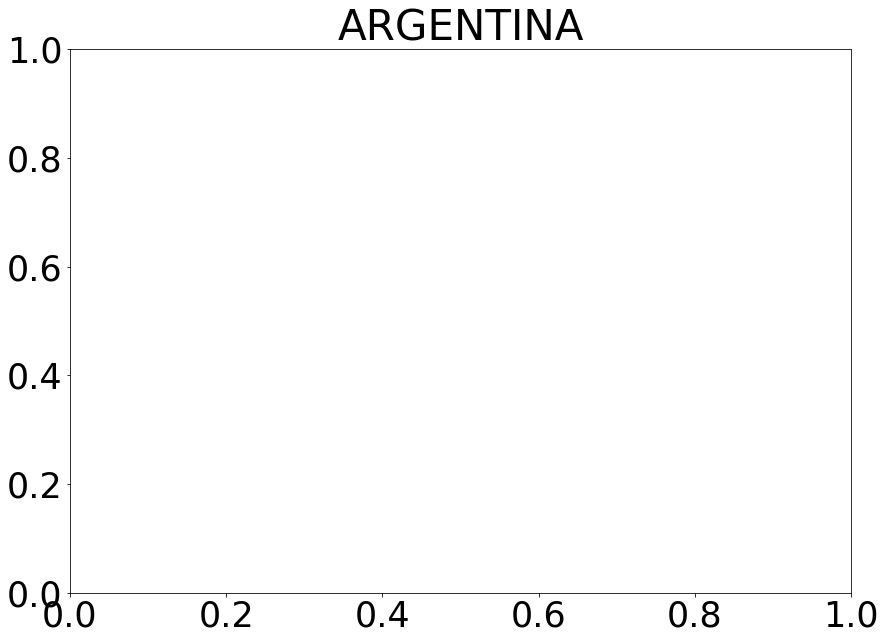

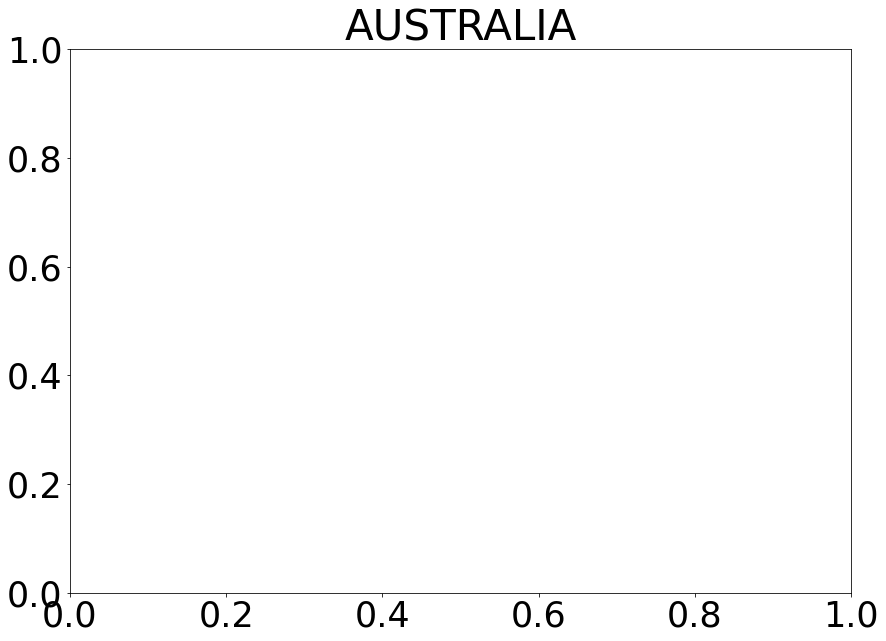

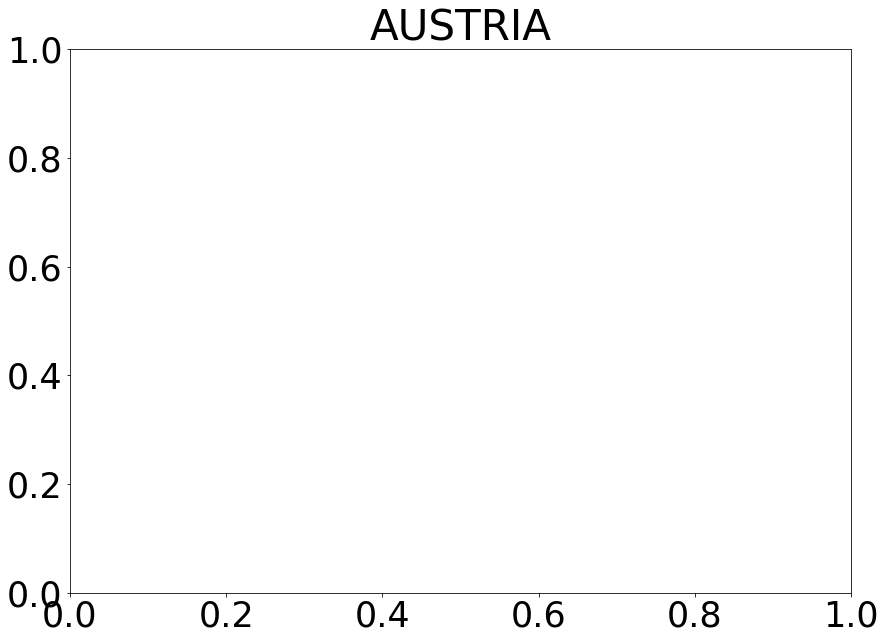

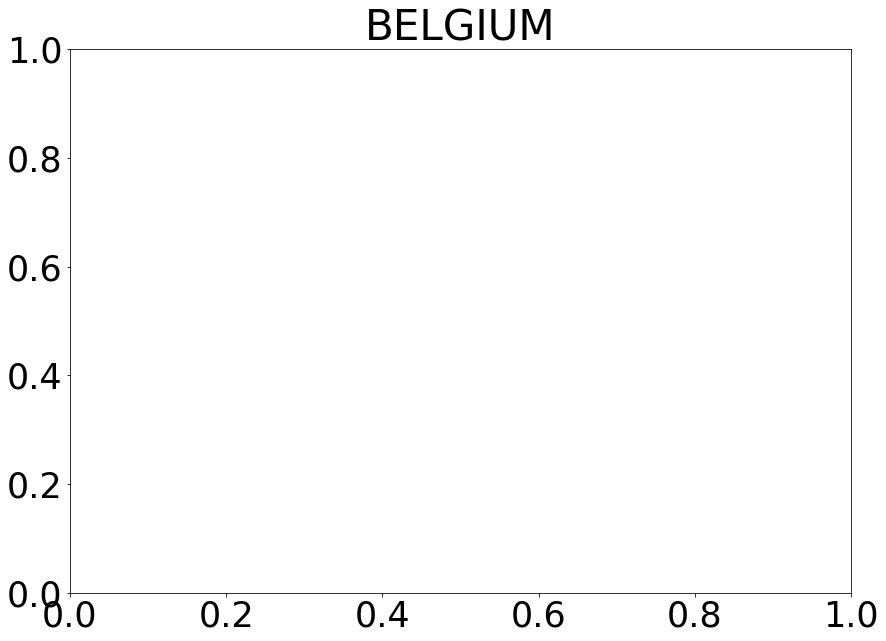

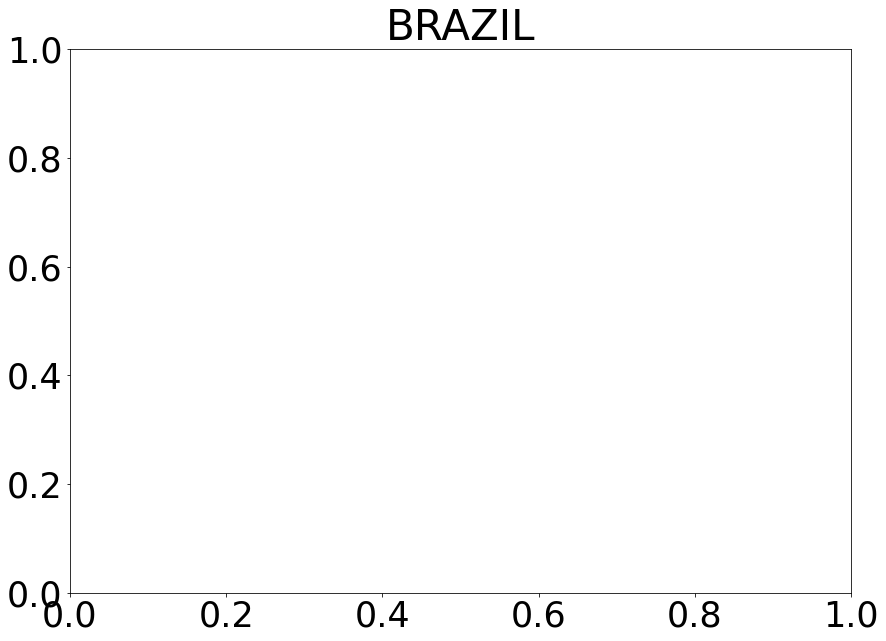

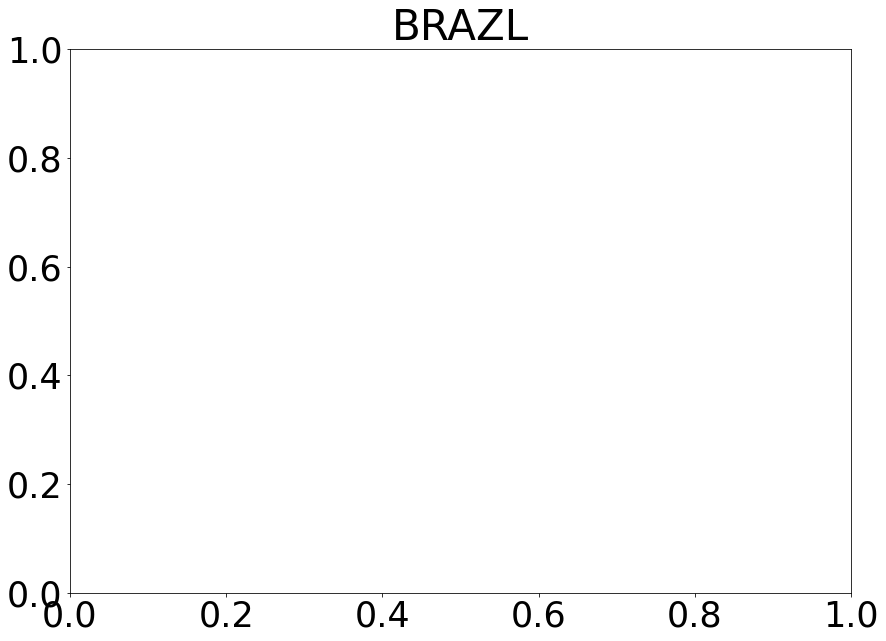

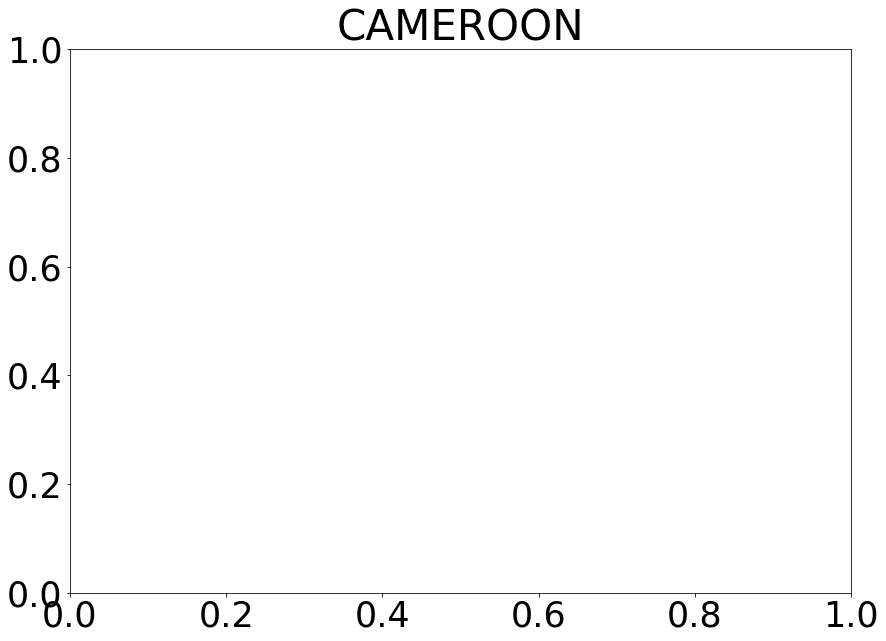

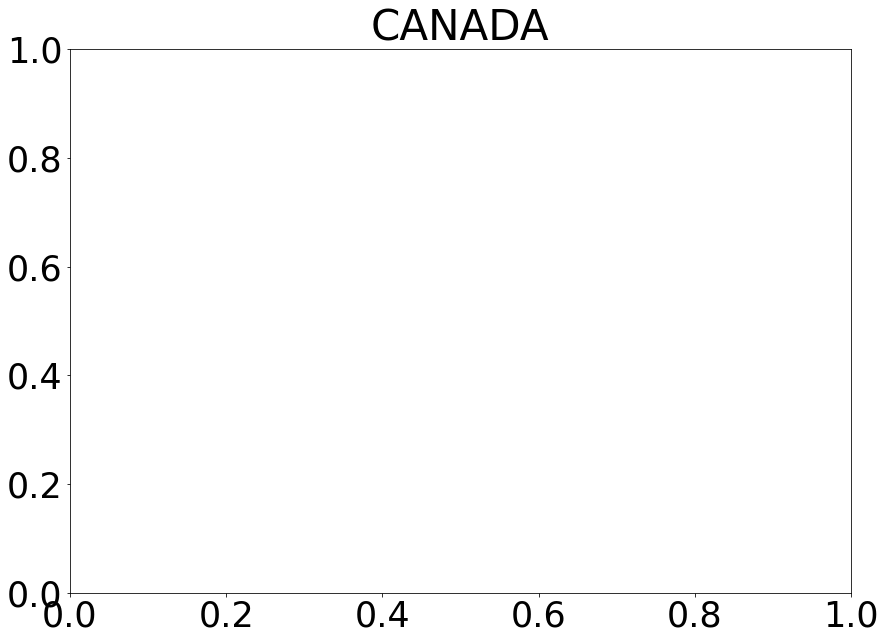

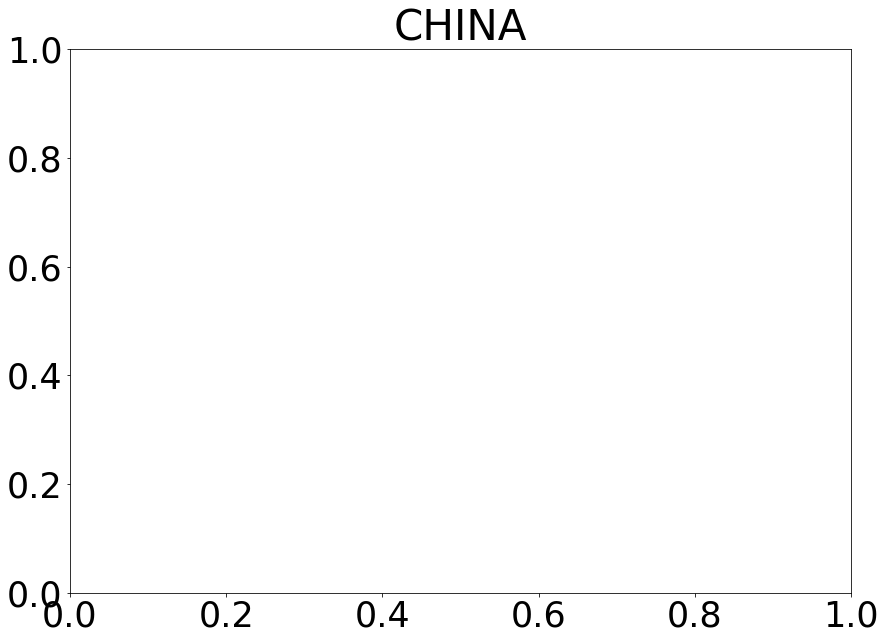

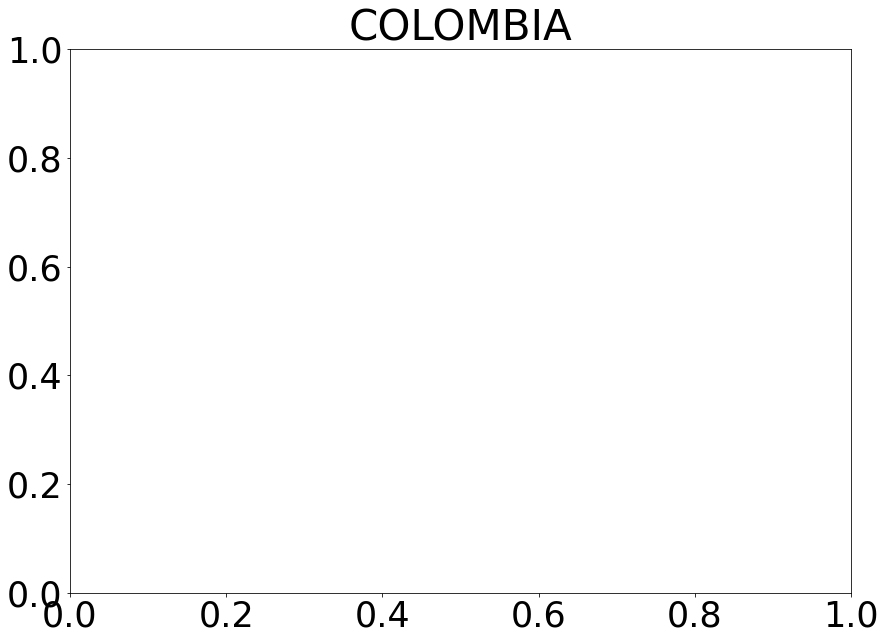

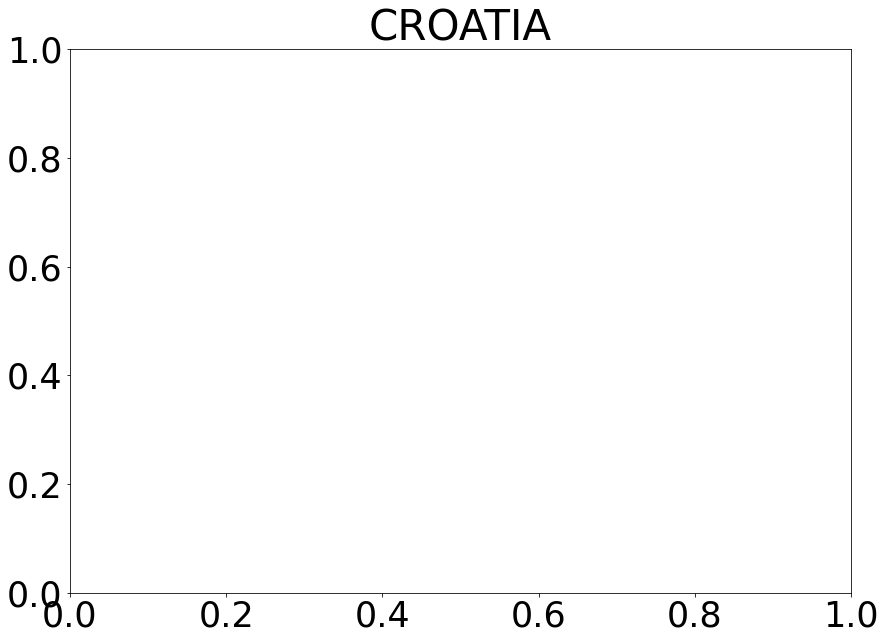

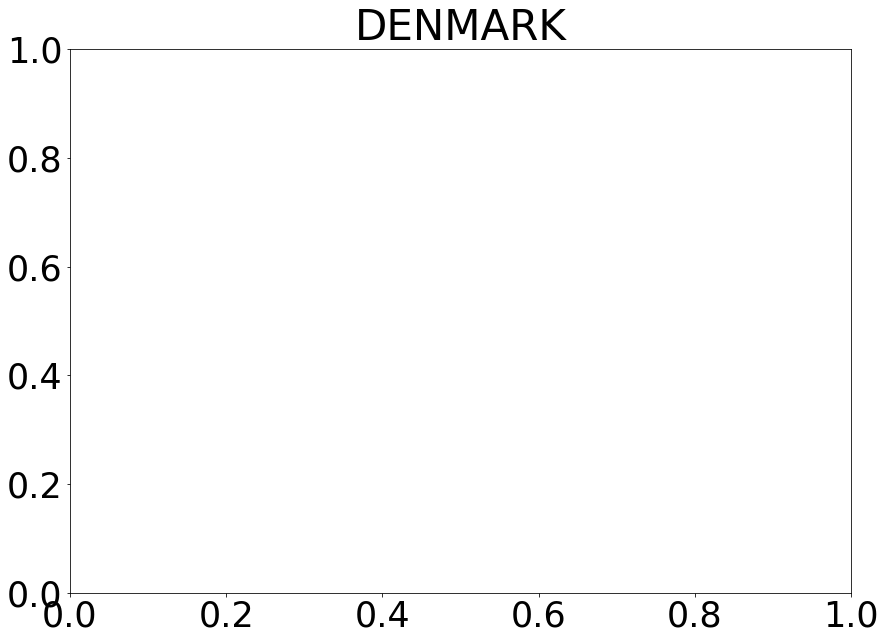

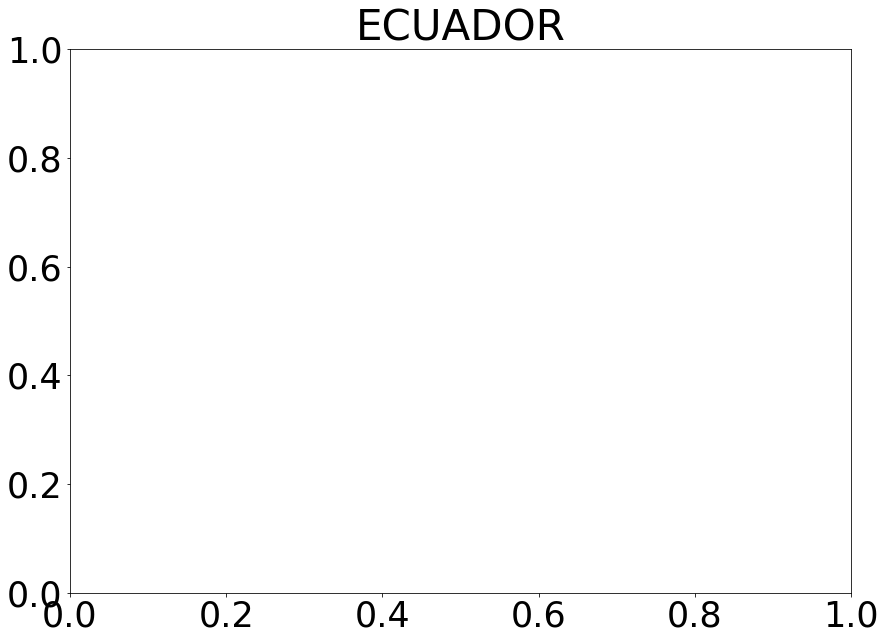

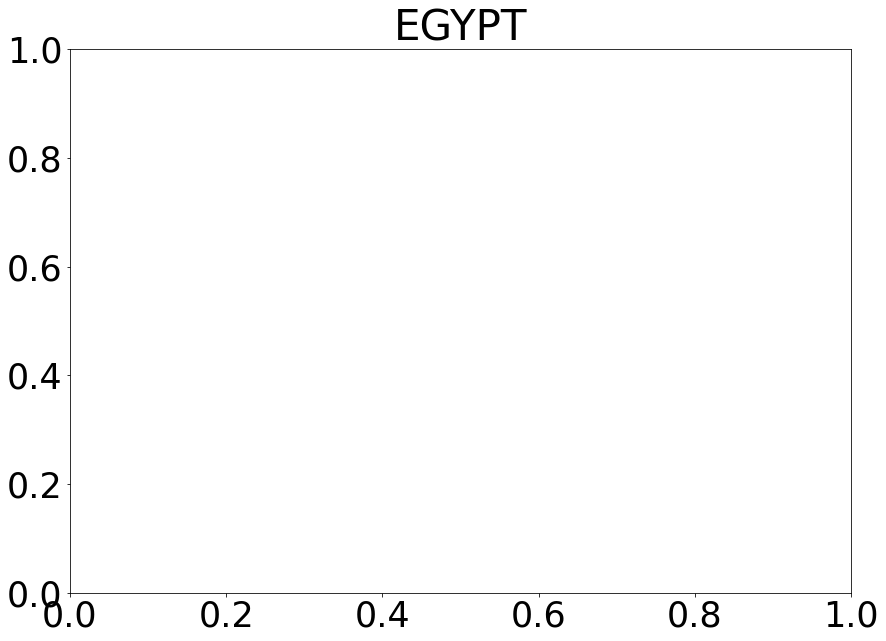

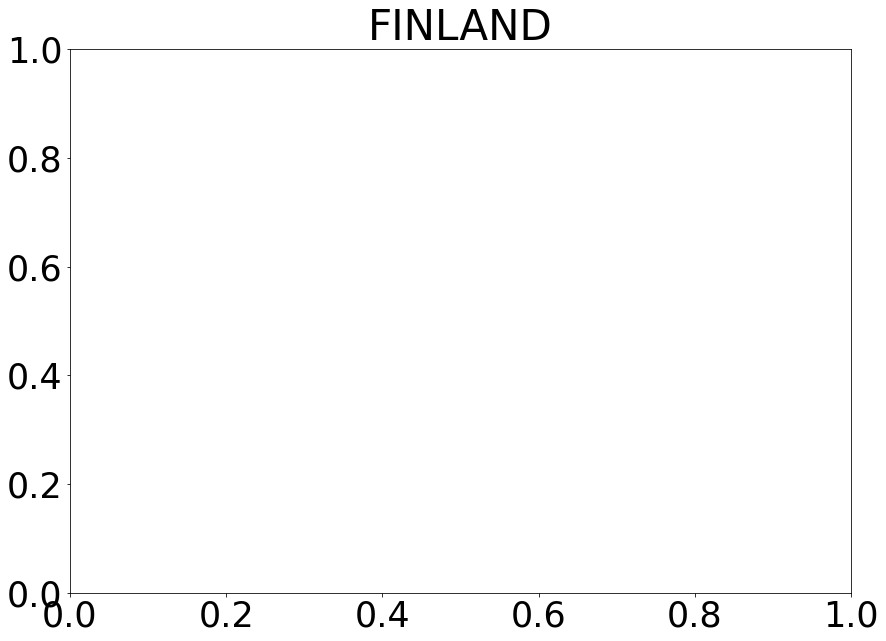

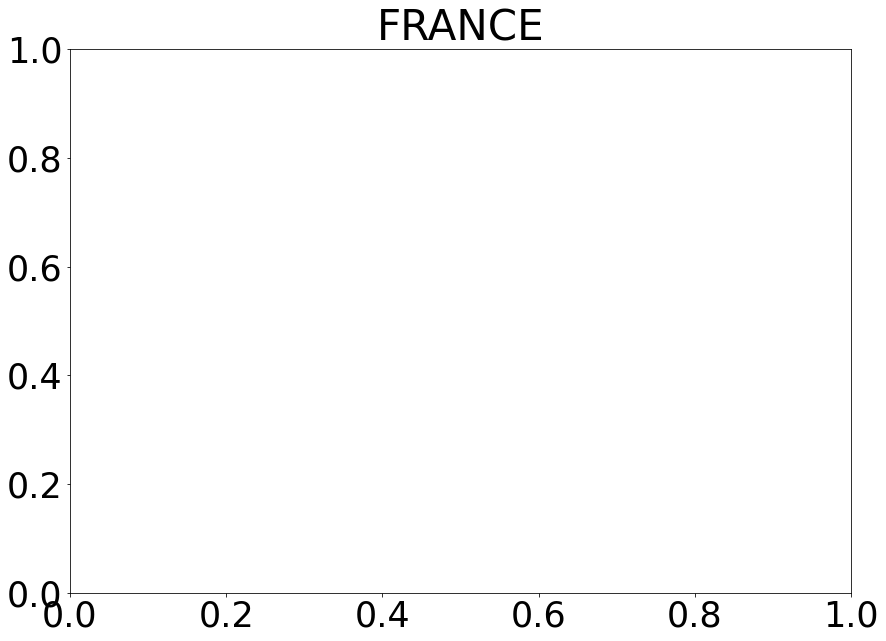

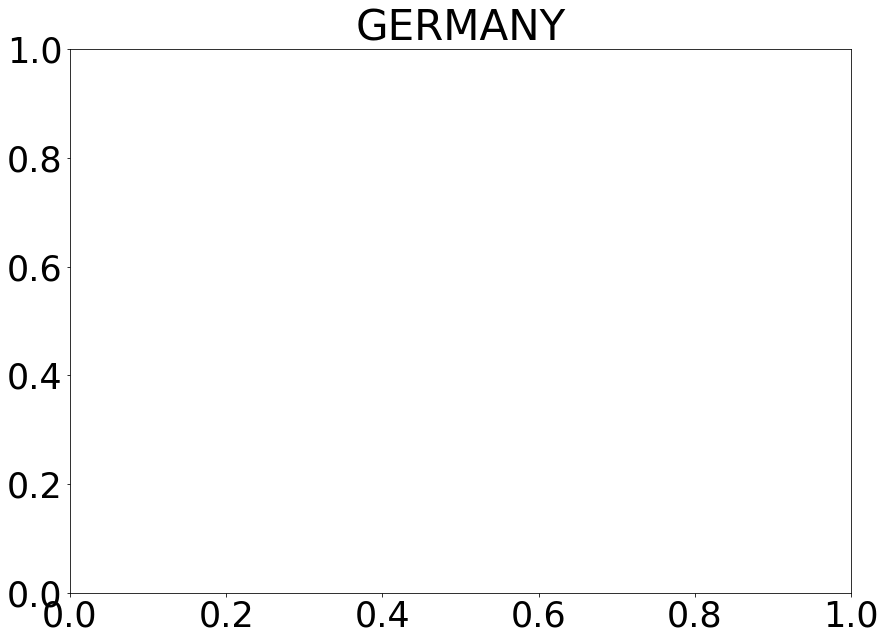

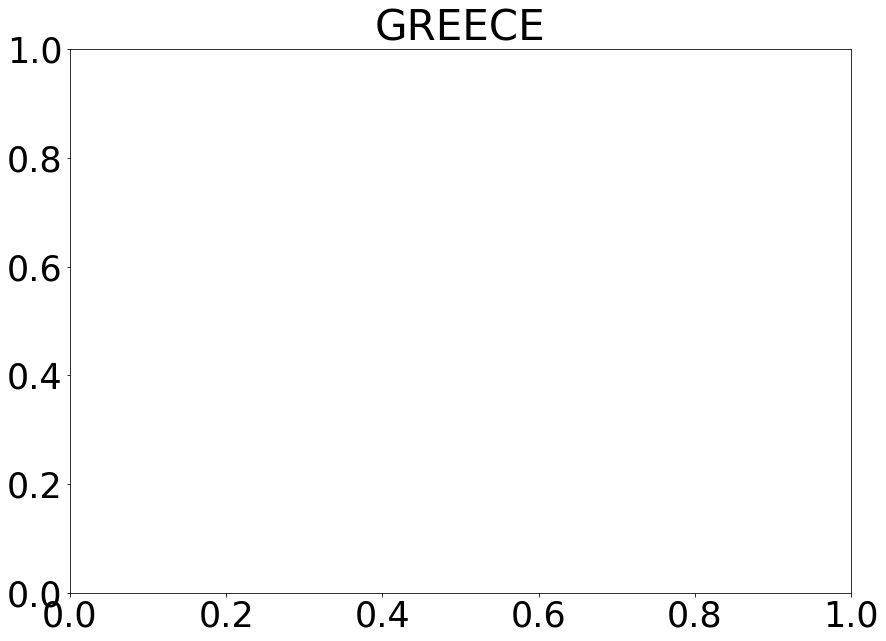

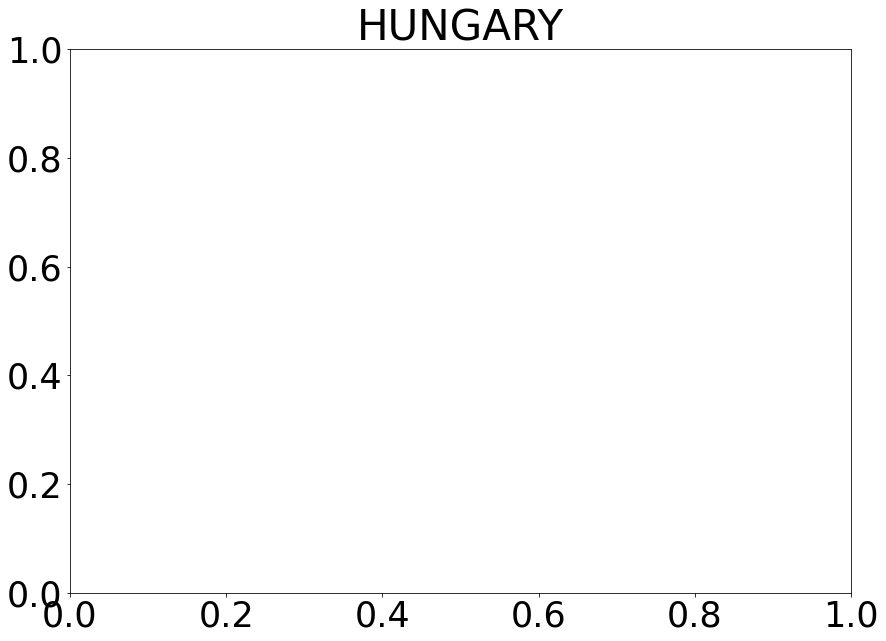

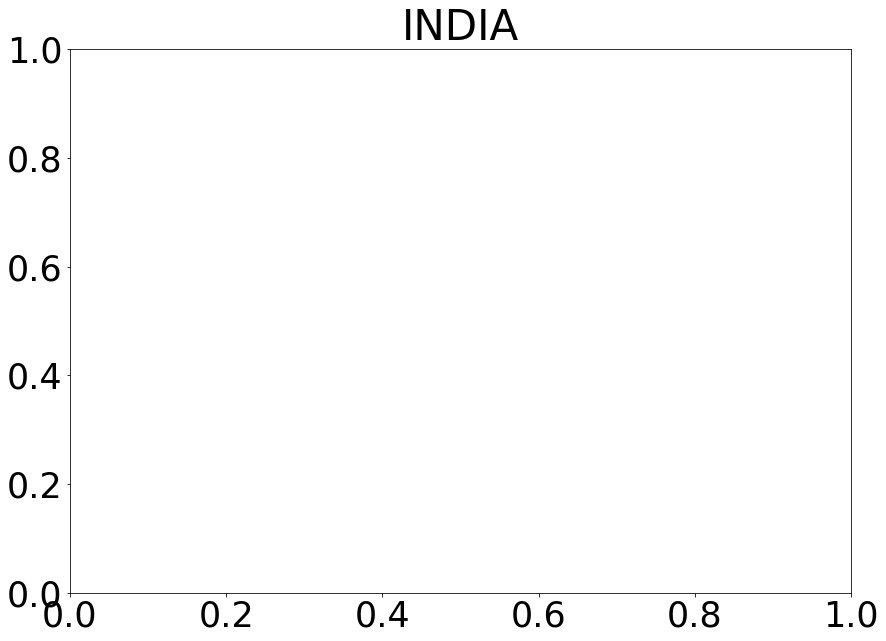

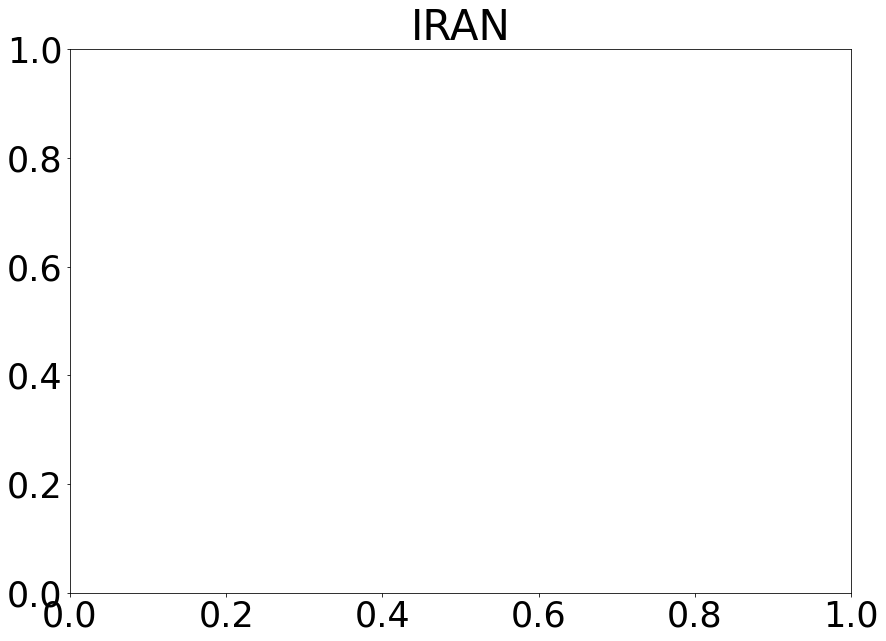

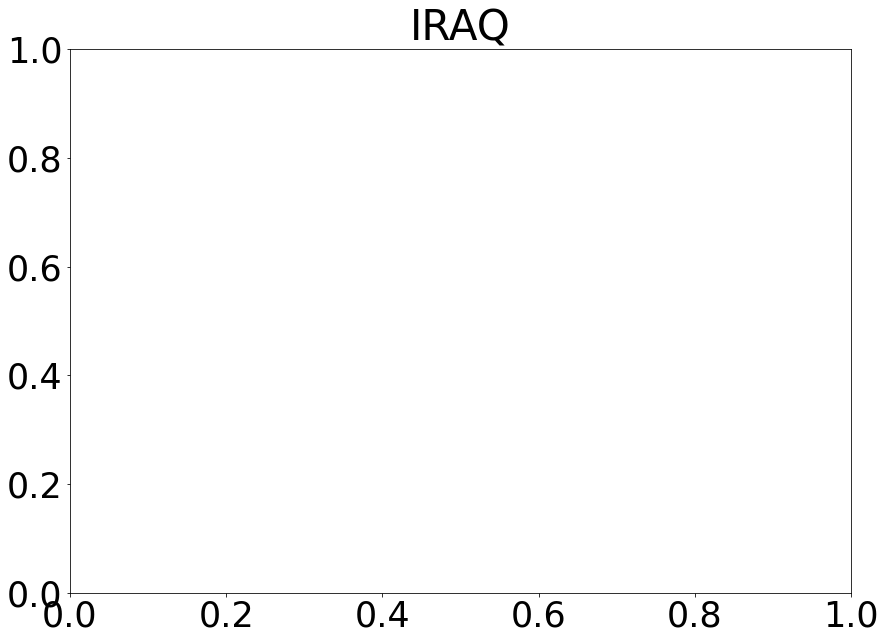

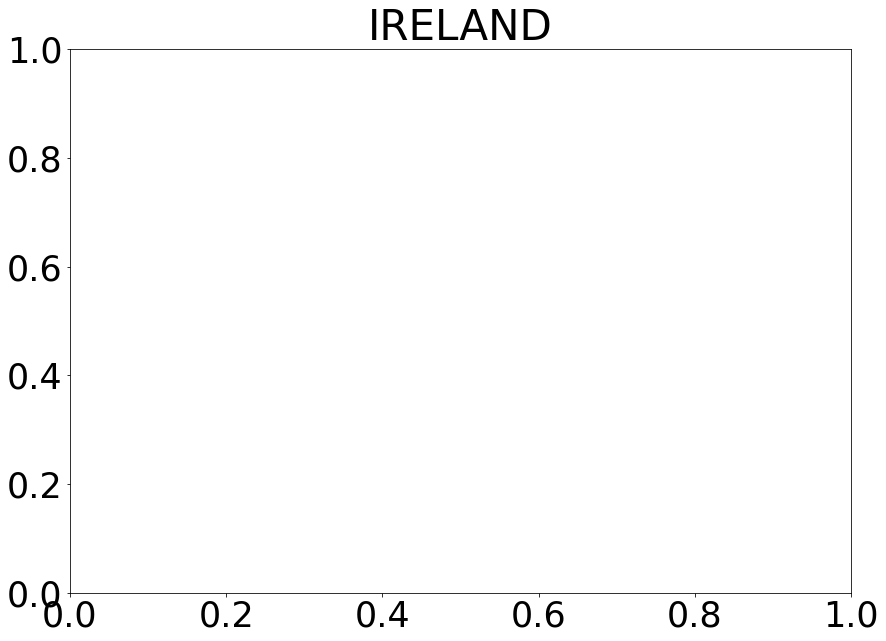

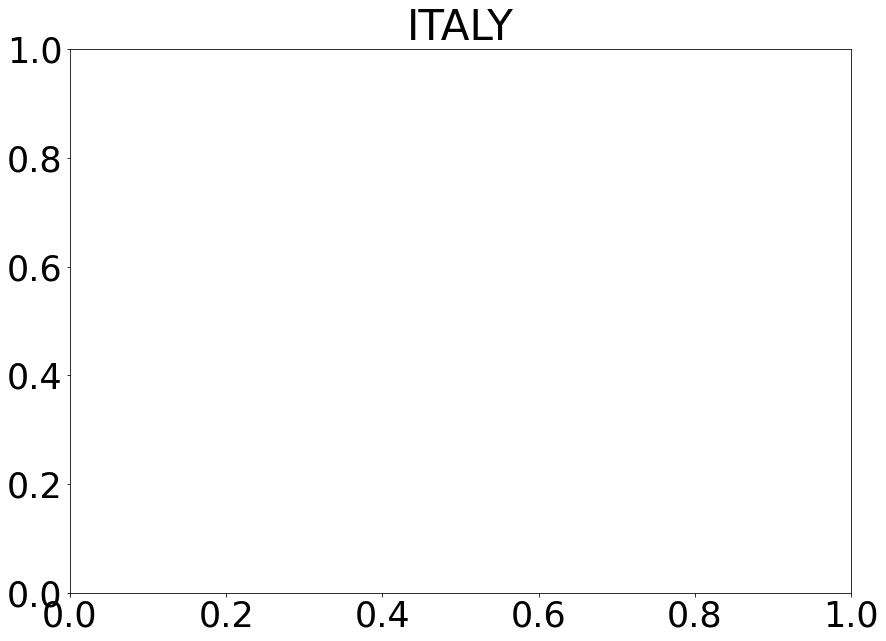

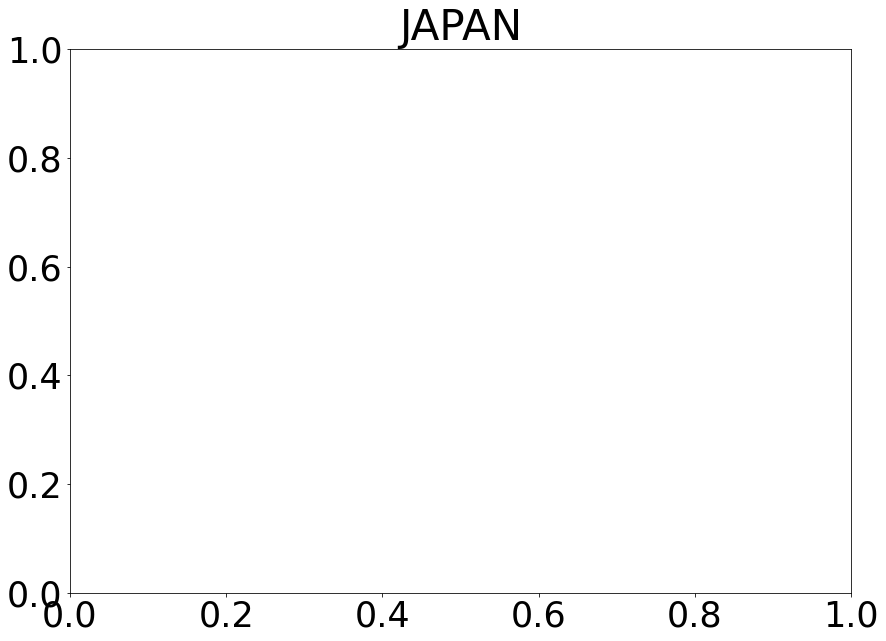

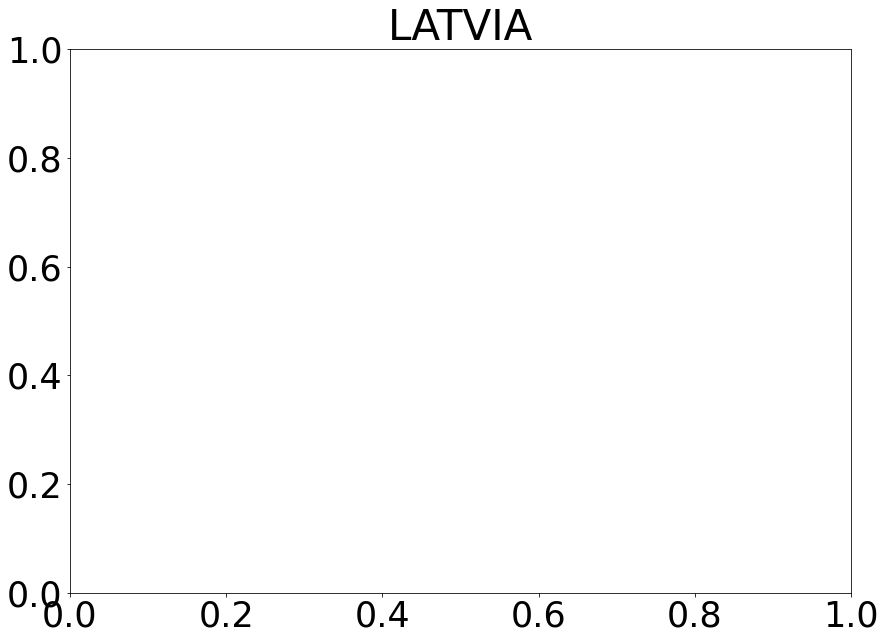

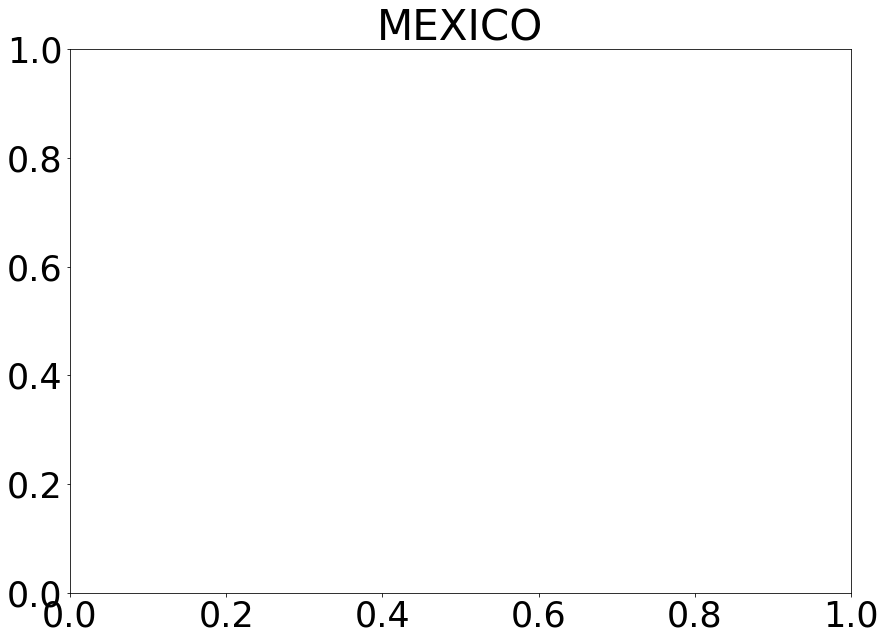

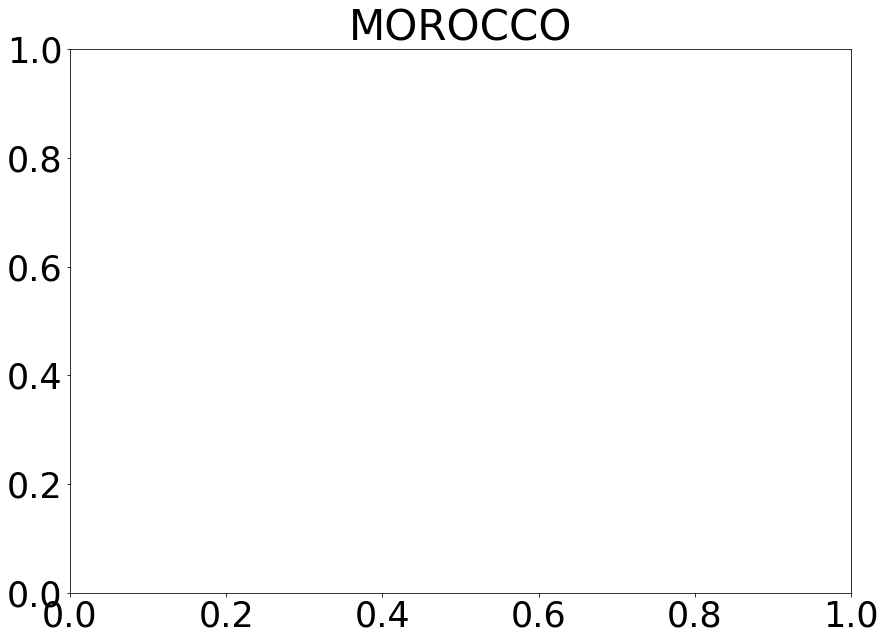

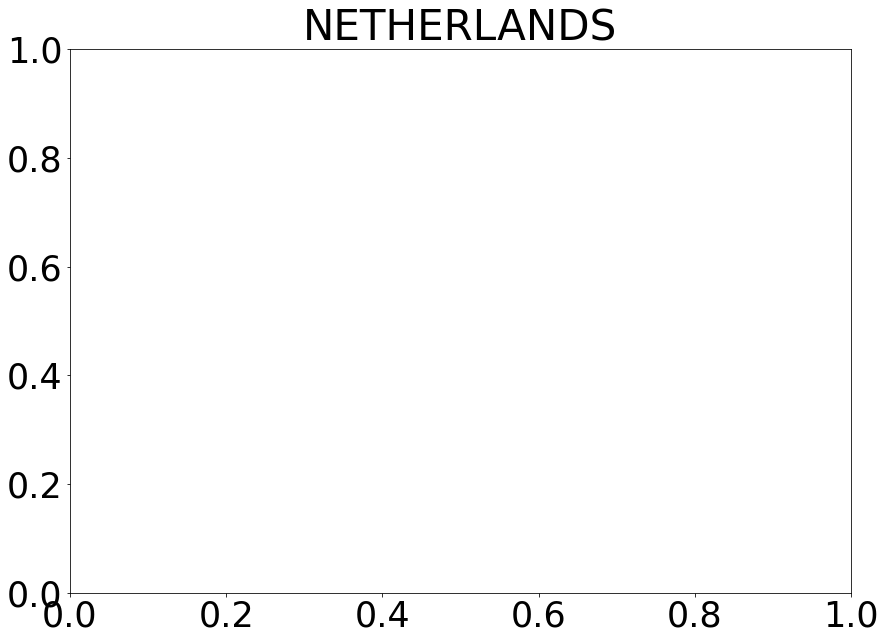

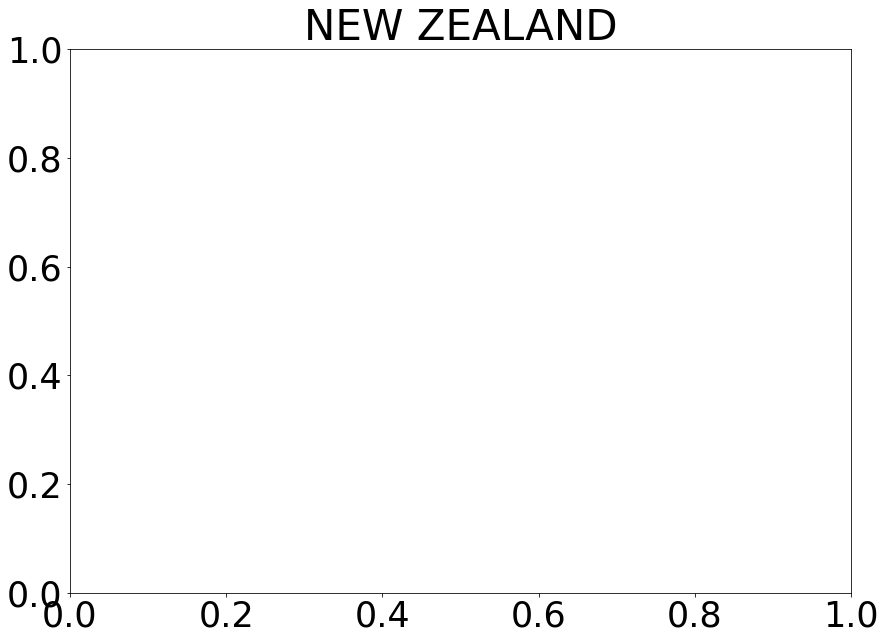

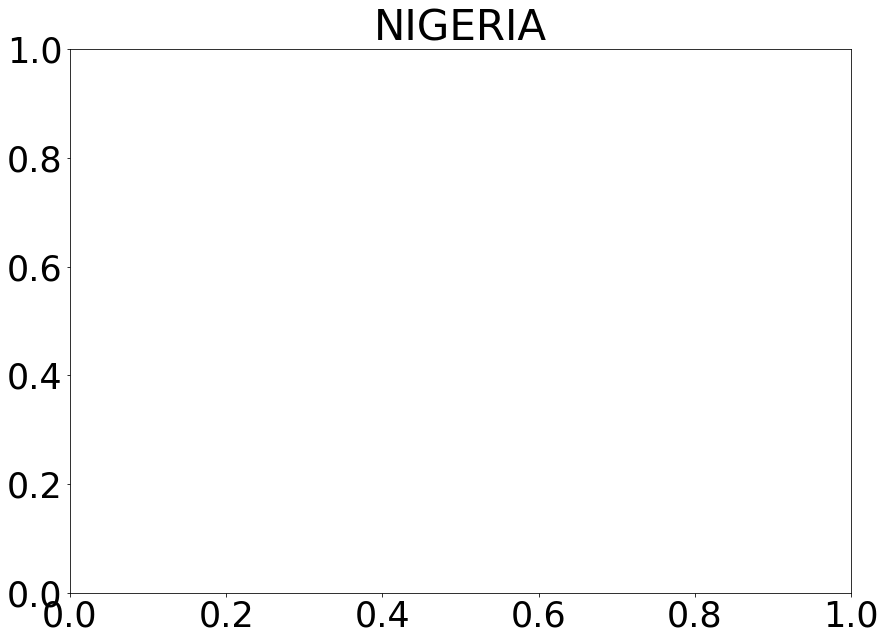

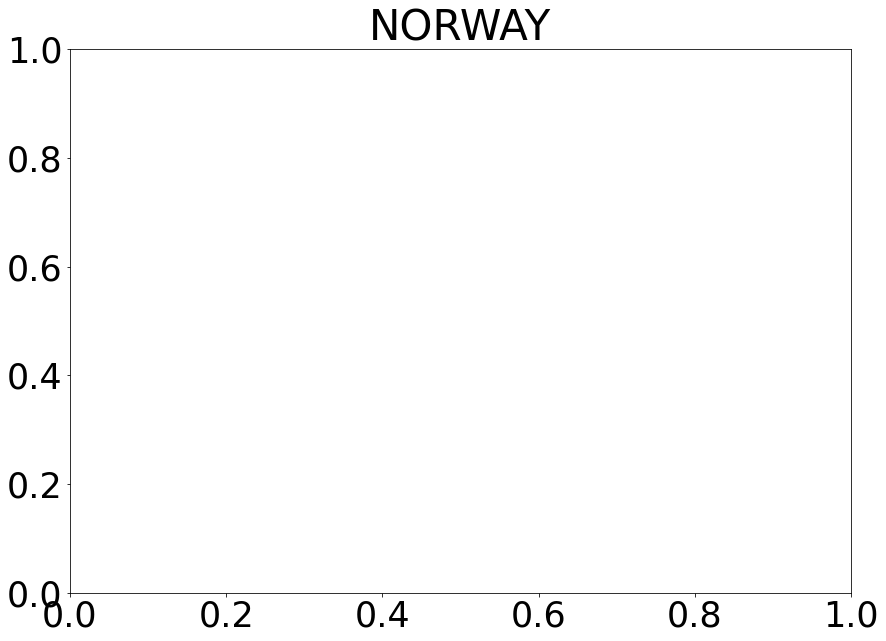

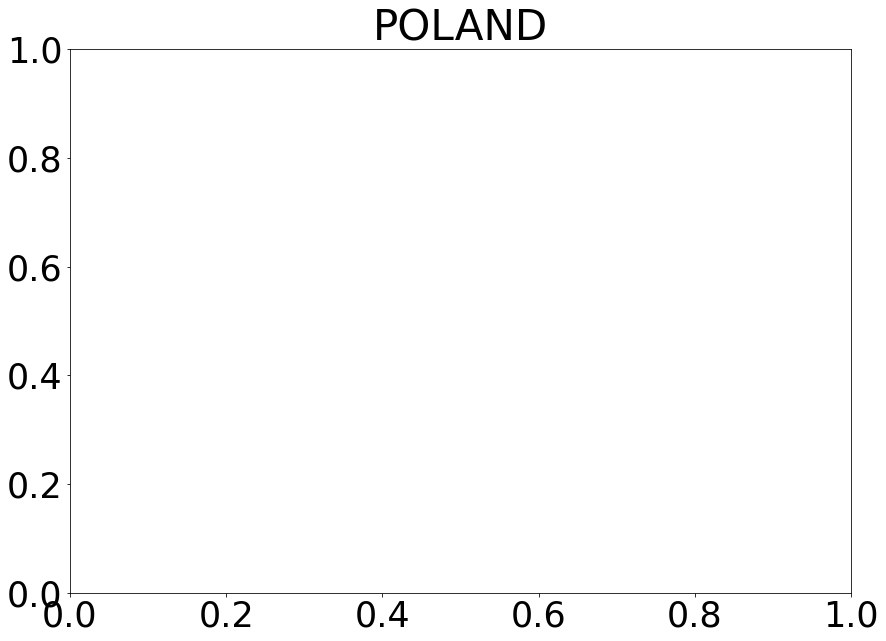

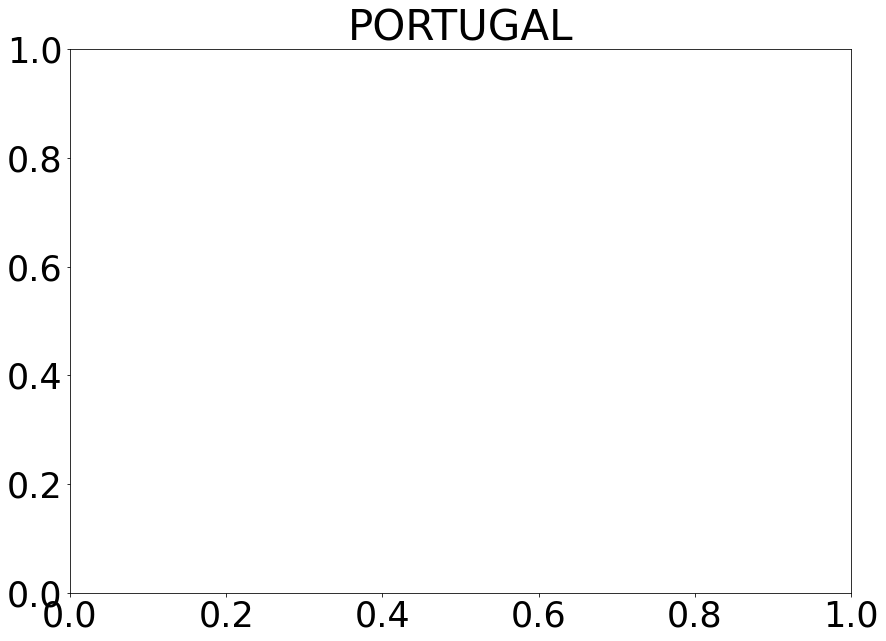

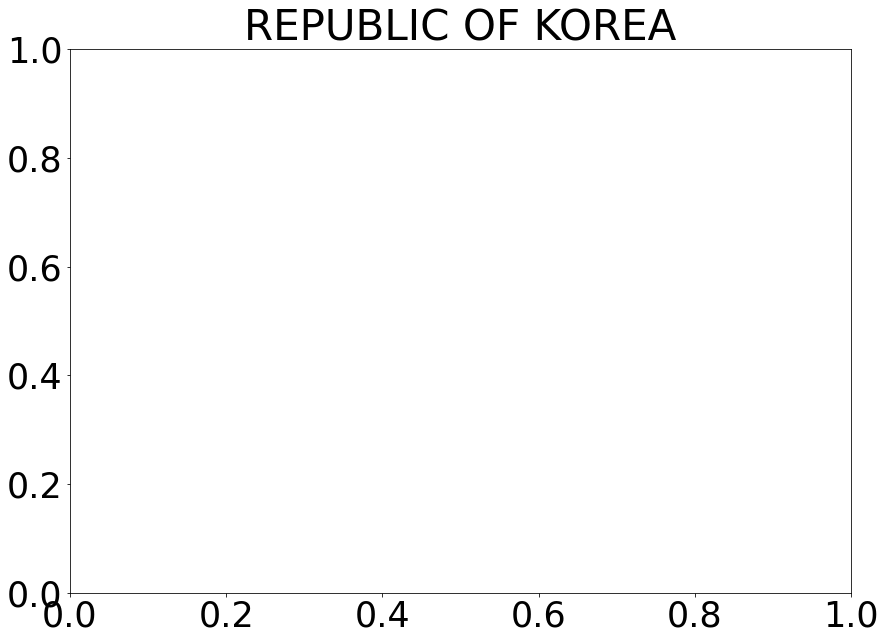

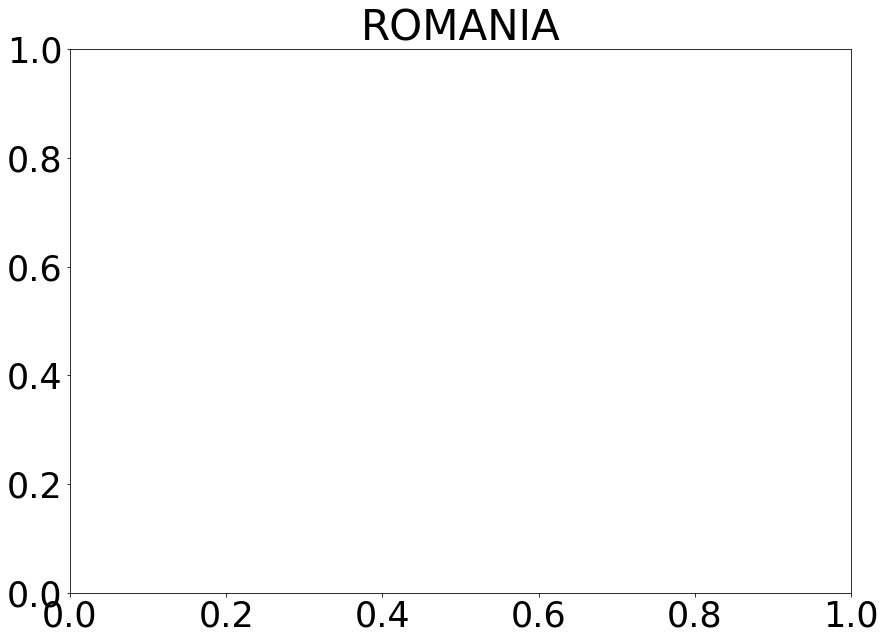

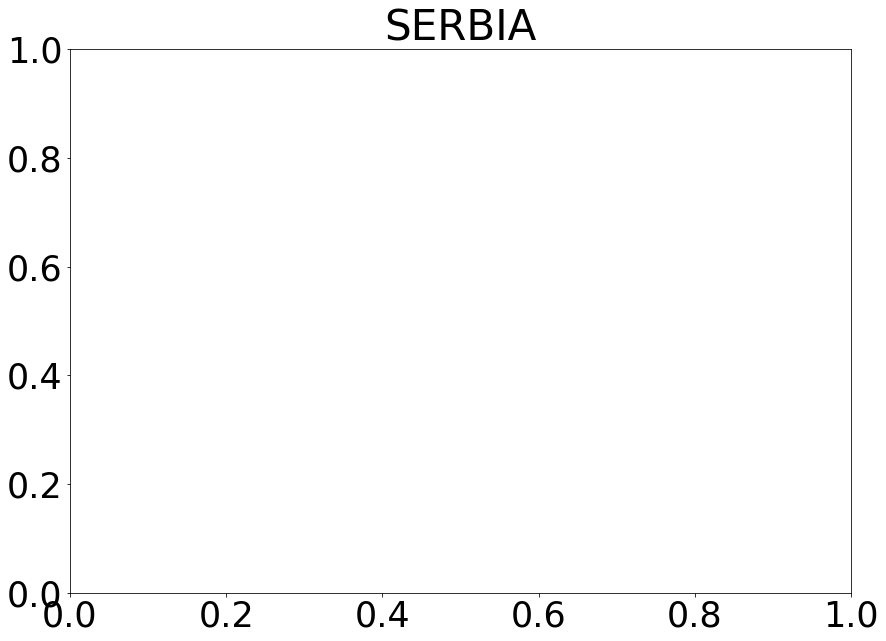

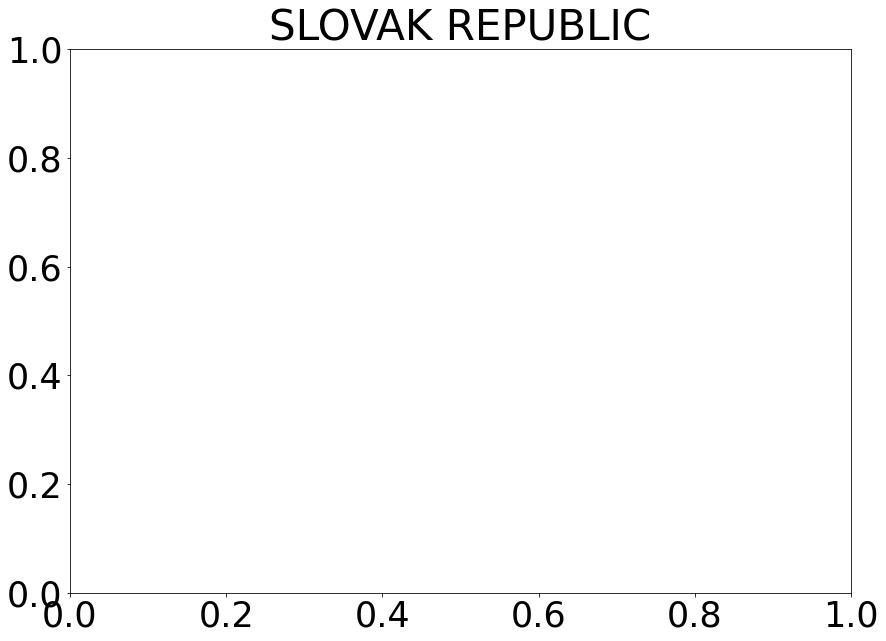

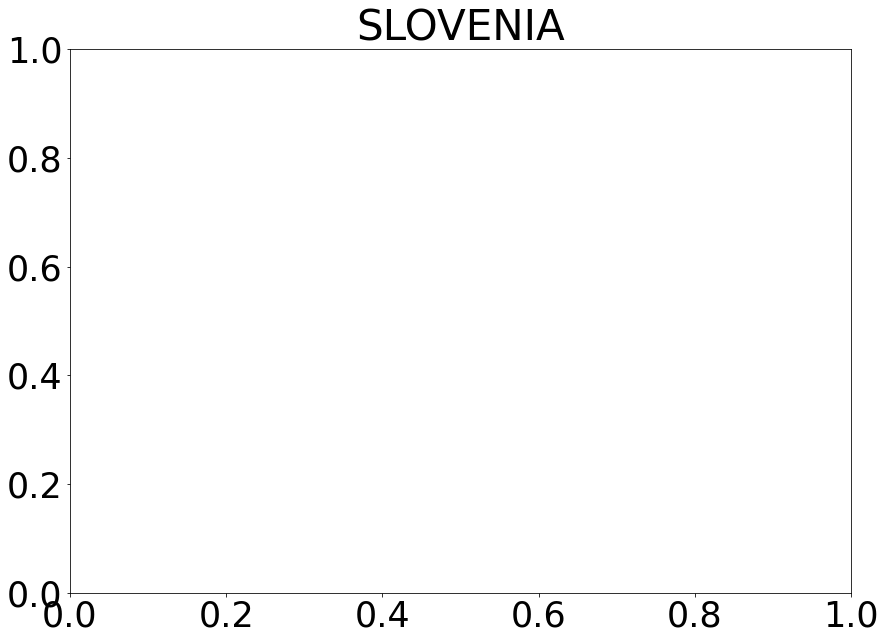

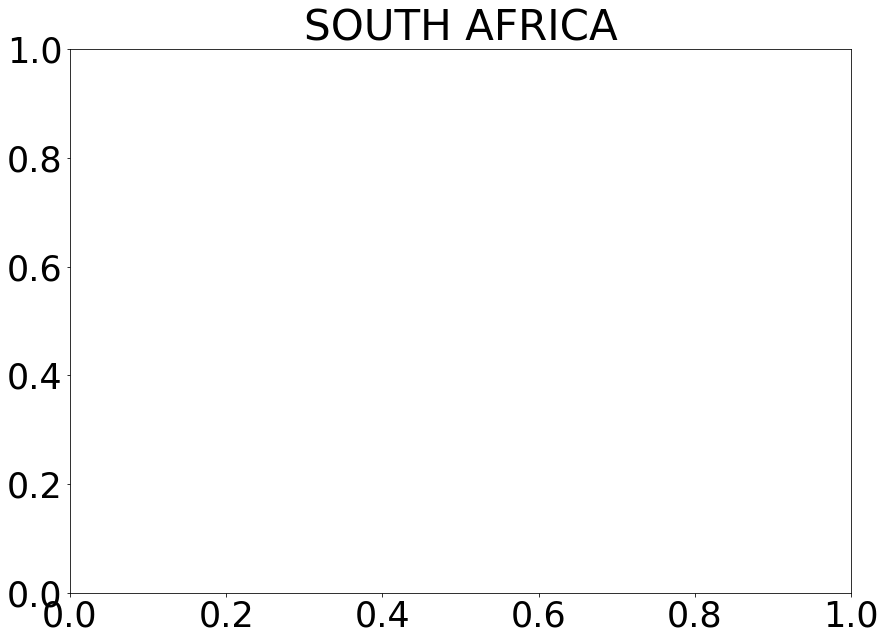

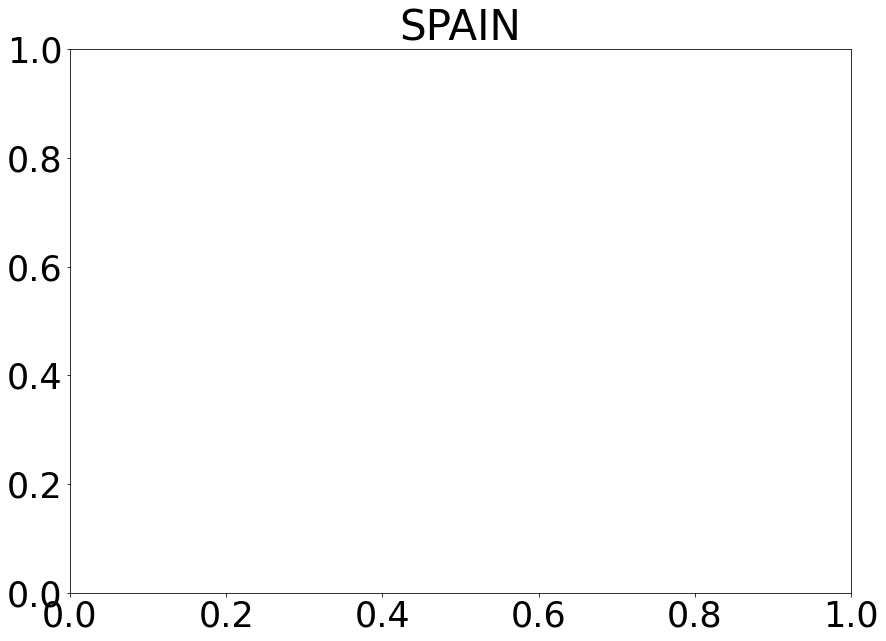

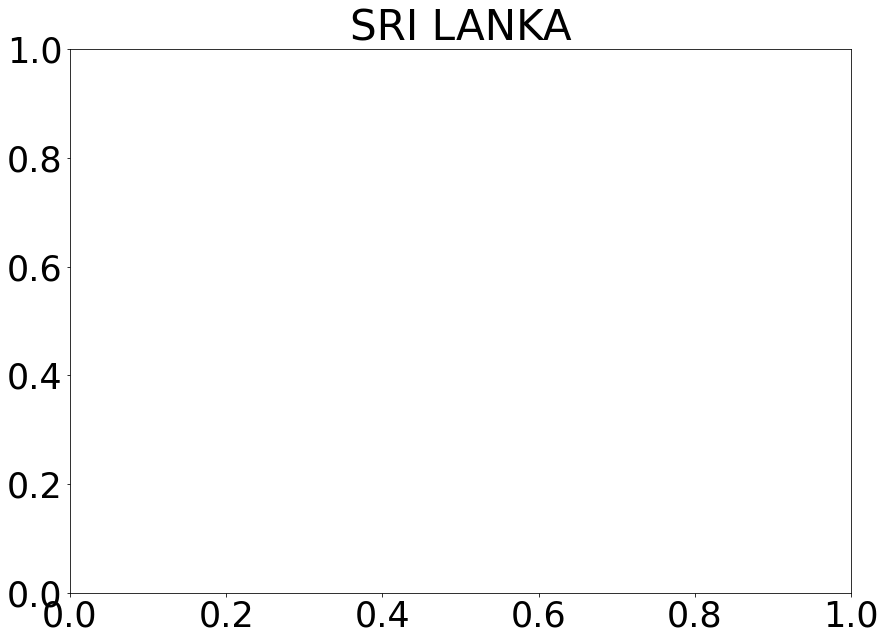

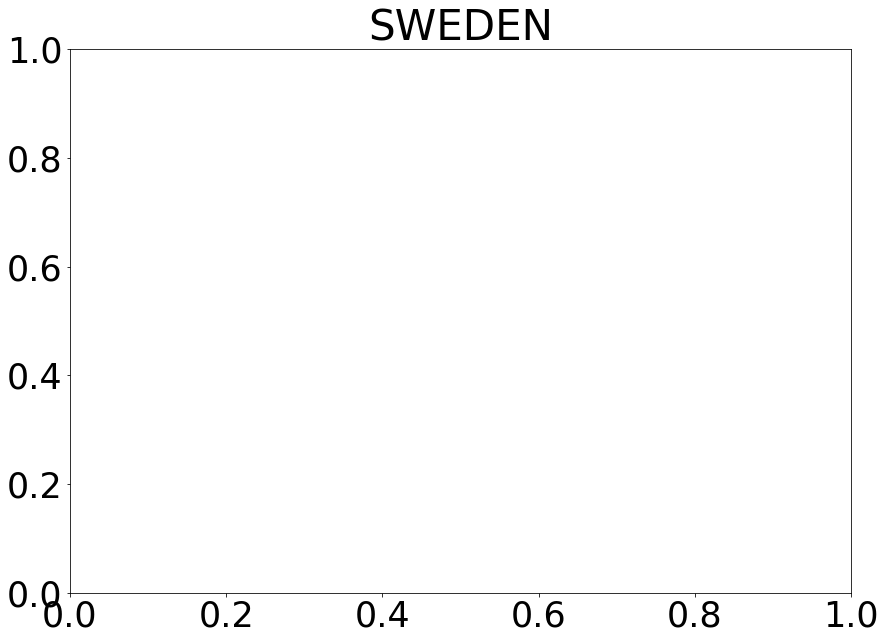

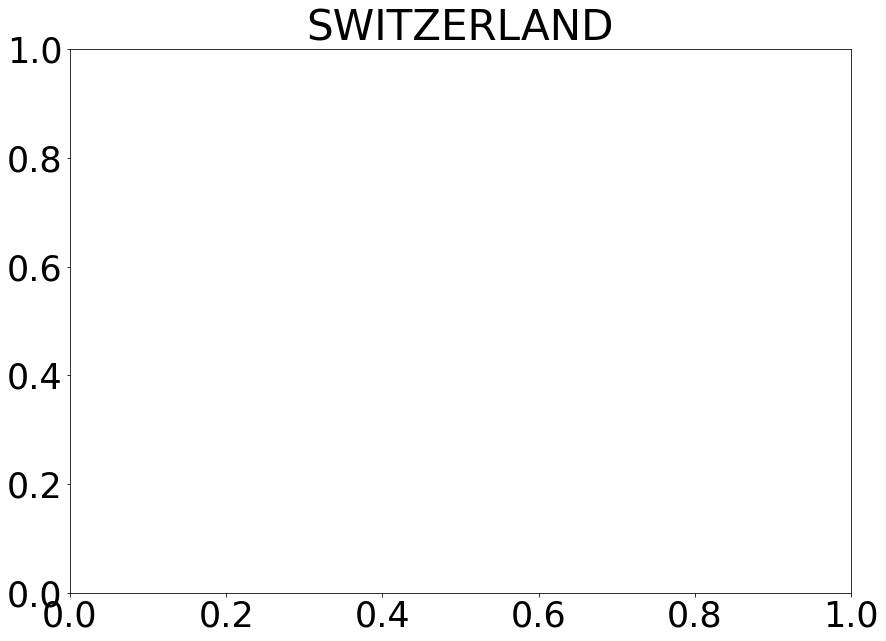

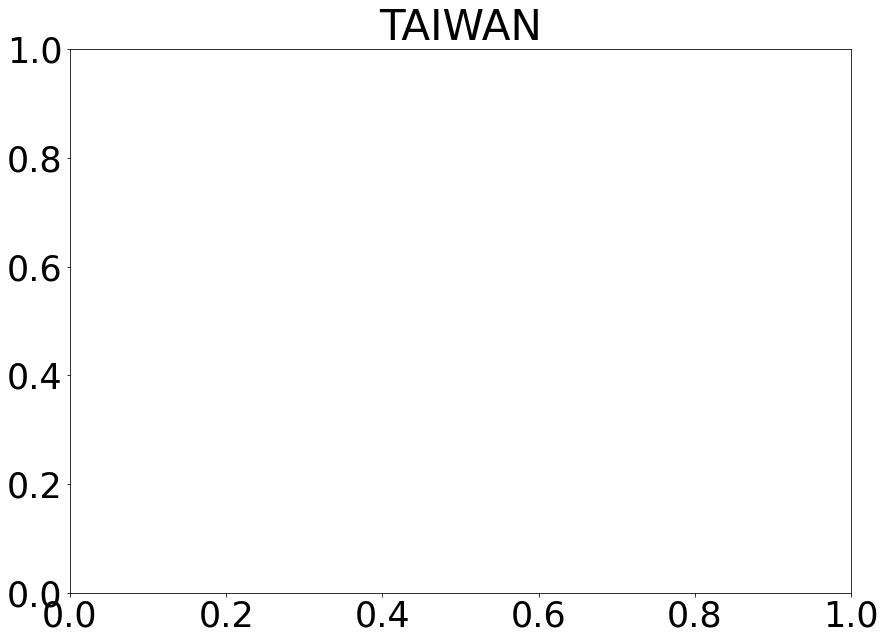

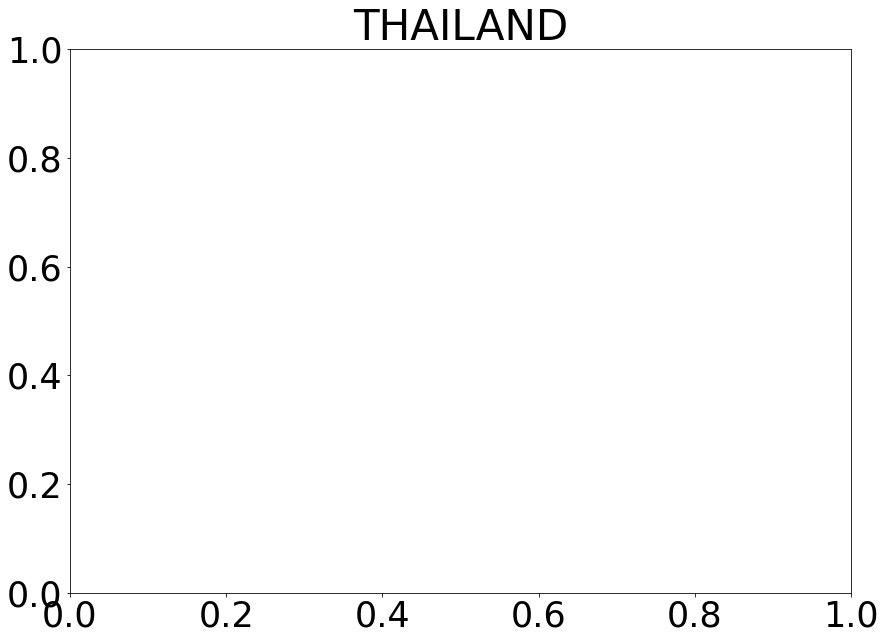

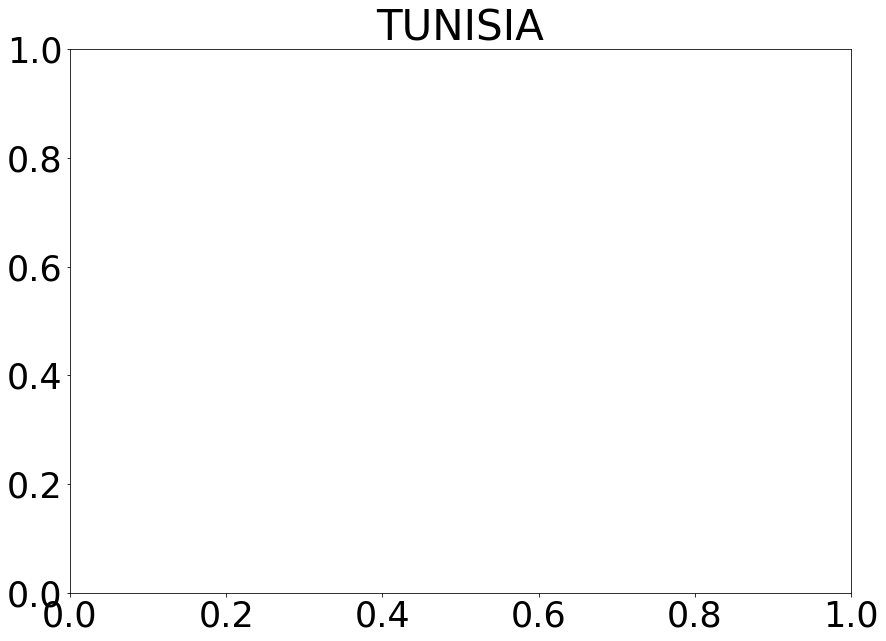

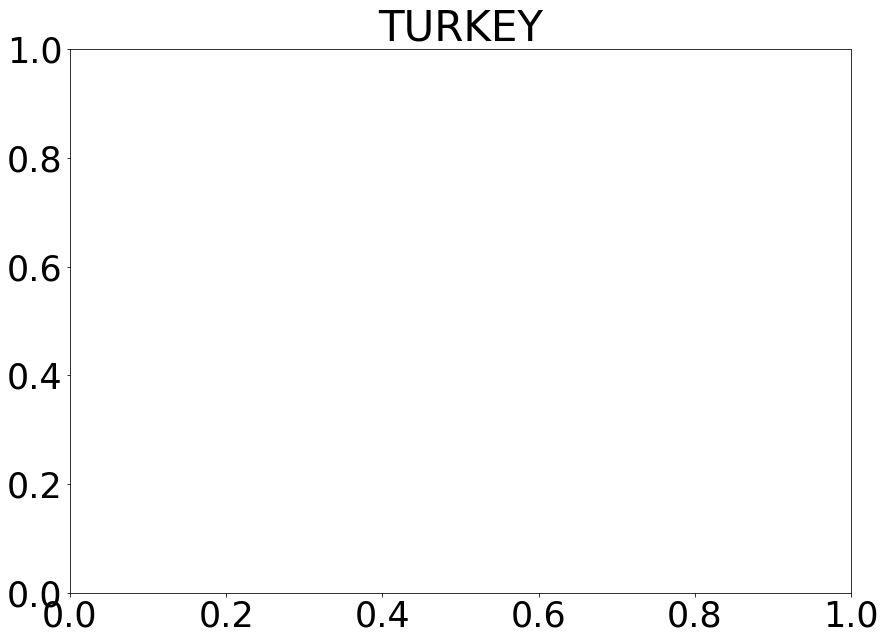

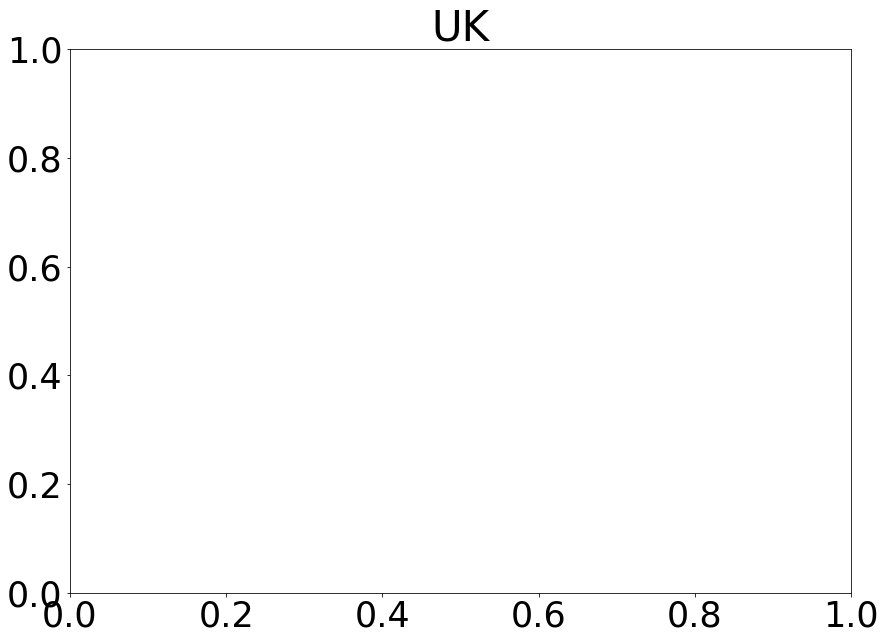

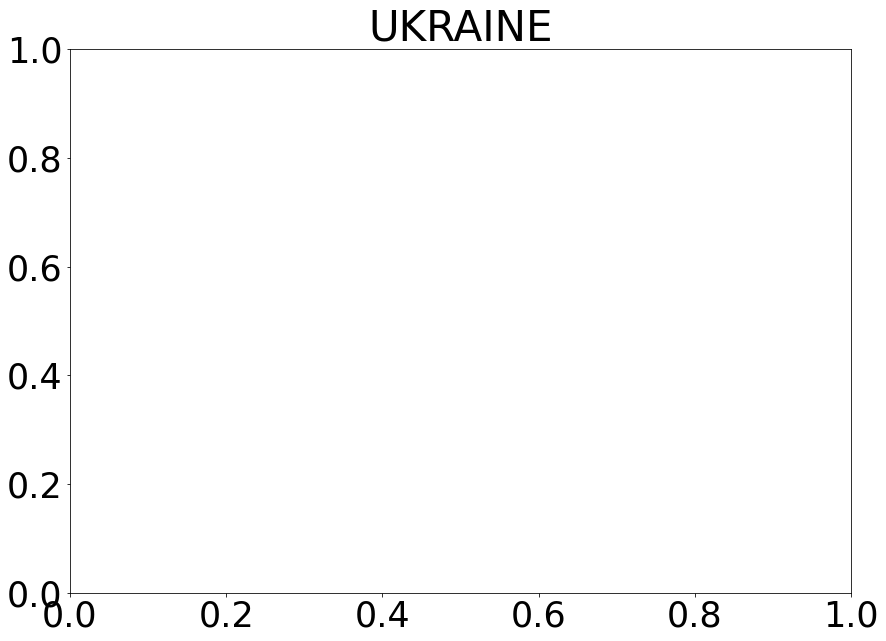

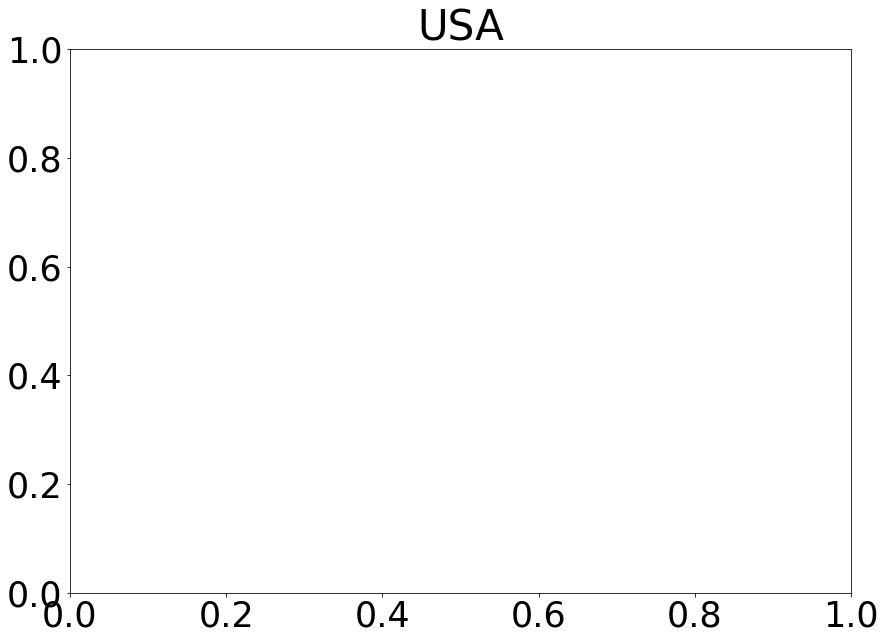

In [33]:
a = 10  # number of rows
b = 3  # number of columns
d = 1  # initialize plot counter

for country in countries:
    #plt.subplot(a, b, d)
    fig = plt.figure(figsize=(14,10))
    #fig, ax = plt.subplots(a, b, c)
    other_countries = [c for c in countries if c != country]
    data.groupby("Year").mean()["General_outcome"].plot.line(color = "k", linewidth = 2, alpha = .3, ax = ax)
    data[data[country] == 1].groupby("Year").mean()["General_outcome"].plot.line(linewidth = 2, ax = ax)
    

#     mean_outcomes[country].plot.line(linewidth = 10, ax = ax)
    for c in other_countries:
        data[data[c] == 1].groupby("Year").mean()["General_outcome"].plot.line(ls = " ", marker = ".", markersize = 15, linewidth = 2, color = "k", alpha = .2, ax = ax)
    plt.title(country)
    plt.show()
    c = d + 1
    plt.close()


In [30]:
journals = list(set(data["Journal"]))
years = sorted(list(set(data["Year"])))
data.groupby(["Journal","Year"]).mean()["General_outcome"]


Journal                                                             Year
3Biotech                                                            2018    1.000000
Acta Agrobotanica                                                   2018    1.000000
Acta Scientiarum. Agronomy                                          2013    1.000000
Aeolian Research                                                    2017    1.000000
Agriculture, Ecosystems & Environment                               2010    1.000000
Agronomy                                                            2020    0.000000
Anais Da Academia Brasileira De Ciencias                            2020    1.000000
Analytical and Bioanalytical Chemistry                              2008    0.000000
Annals of Tropical Medicine and Health                              2019    1.000000
Applied Ecology and Environmental Research                          2018    1.000000
Applied Sciences                                                    2020    1